In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn, collections, itertools, math

%matplotlib inline
from matplotlib import pyplot
matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (numpy.mean(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((numpy.mean(values),) + bars)

pandas.set_option('display.max_columns', 500)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sources = pandas.read_csv("../data/derived/sources.full.csv", index_col="source_id")
sources["source_id"] = sources.index
timepoint_paired_donors = set(d for d in sources.donor
                              if len(sources.ix[sources.donor == d].timepoint.unique()) > 1 )
timepoint_paired_donors
sources["timepoint_paired"] = sources.donor.isin(timepoint_paired_donors)
sources

RNA_ID   RNA biospecimen  \
source_id                                                
AOCS-001-1-7     ICGCDBDE20130916001      AOCS-001-2-0   
AOCS-004-1-5     ICGCDBDE20130916003      AOCS-004-2-9   
AOCS-005-1-8     ICGCDBDE20130916004      AOCS-005-2-1   
AOCS-034-1-0    ICGCDBLG2010050402TR      AOCS-034-2-4   
AOCS-034-3-8     ICGCDBDE20131122024      AOCS-034-4-1   
AOCS-055-1-7     ICGCDBDE20130916005      AOCS-055-2-0   
AOCS-056-1-X    ICGCDBLG2010062229TR      AOCS-056-2-3   
AOCS-057-1-2   EXTERNAOCS20140414001      AOCS-057-2-6   
AOCS-058-1-5    ICGCDBLG2010062235TR      AOCS-058-2-9   
AOCS-059-1-8     ICGCDBDE20130916006      AOCS-059-2-1   
AOCS-060-1-5     ICGCDBDE20130916007      AOCS-060-2-9   
AOCS-061-1-8     ICGCDBDE20130916008      AOCS-061-2-1   
AOCS-063-1-3     ICGCDBDE20130916009      AOCS-063-2-7   
AOCS-064-1-6    ICGCDBLG2010062214TR      AOCS-064-2-X   
AOCS-064-3-3    ICGCDBLG2010062215FR      AOCS-064-4-7   
AOCS-065-1-9    ICGCDBLG2010062219TR      AOCS-065-2-2   
AOCS-065-3-6    ICGCDBLG2010062220FR      AOCS-065-4-X   
AOCS-075-1-0     ICGCDBDE20130916010      AOCS-075-2-4   
AOCS-076-1-3     ICGCDBDE20130916011      AOCS-076-2-7   
AOCS-077-1-6     ICGCDBDE20130916012      AOCS-077-2-X   
AOCS-078-1-9     ICGCDBDE20130916013      AOCS-078-2-2   
AOCS-079-1-1     ICGCDBDE20130916014      AOCS-079-2-5   
AOCS-080-1-9    ICGCDBLG2010102737TR      AOCS-080-2-2   
AOCS-081-1-1     ICGCDBDE20130916015      AOCS-081-2-5   
AOCS-083-1-7     ICGCDBDE20130916016      AOCS-083-2-0   
AOCS-084-1-X     ICGCDBDE20130916017      AOCS-084-2-3   
AOCS-085-1-2     ICGCDBDE20130916018      AOCS-085-2-6   
AOCS-086-1-5    ICGCDBLG2010102755TR      AOCS-086-2-9   
AOCS-086-3-2    ICGCDBLG2010102759FR      AOCS-086-4-6   
AOCS-088-1-0    ICGCDBLG2010102757TR      AOCS-088-2-4   
...                              ...               ...   
AOCS-144-1-3     ICGCDBDE20131122034      AOCS-144-2-7   
AOCS-145-1-6     ICGCDBDE20131122006      AOCS-145-2-X   
AOCS-146-1-9     ICGCDBDE20131122007      AOCS-146-2-2   
AOCS-147-1-1     ICGCDBDE20131122035      AOCS-147-2-5   
AOCS-148-1-4     ICGCDBDE20131122008      AOCS-148-2-8   
AOCS-149-1-7     ICGCDBDE20131122009      AOCS-149-2-0   
AOCS-150-3-1     ICGCDBDE20130916040      AOCS-150-4-5   
AOCS-150-8-X   EXTERNAOCS20140414004     AOCS-150-10-7   
AOCS-152-1-X     ICGCDBDE20131122022      AOCS-152-2-3   
AOCS-153-1-2     ICGCDBDE20131122023      AOCS-153-2-6   
AOCS-155-3-5     ICGCDBDE20131122043      AOCS-155-4-9   
AOCS-157-1-3   EXTERNAOCS20140414005      AOCS-157-2-7   
AOCS-158-1-6   EXTERNAOCS20140414006      AOCS-158-2-X   
AOCS-159-1-9   EXTERNAOCS20140227002      AOCS-159-2-2   
AOCS-160-1-6   EXTERNAOCS20140414007      AOCS-160-2-X   
AOCS-161-1-9   EXTERNAOCS20140227003      AOCS-161-2-2   
AOCS-162-1-1   EXTERNAOCS20140227004      AOCS-162-2-5   
AOCS-163-1-4   EXTERNAOCS20140227005      AOCS-163-2-8   
AOCS-164-1-7   EXTERNAOCS20140227006      AOCS-164-2-0   
AOCS-165-1-X   EXTERNAOCS20140227007      AOCS-165-2-3   
AOCS-166-1-2   EXTERNAOCS20140227008      AOCS-166-2-6   
AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
AOCS-167-3-2   EXTERNAOCS20140227013      AOCS-167-4-6   
AOCS-168-1-8   EXTERNAOCS20140414008      AOCS-168-2-1   
AOCS-169-1-0   EXTERNAOCS20140414009      AOCS-169-2-4   
AOCS-170-1-8   EXTERNAOCS20140227017      AOCS-170-2-1   
AOCS-170-3-5   EXTERNAOCS20140227018      AOCS-170-4-9   
AOCS-171-1-0   EXTERNAOCS20140227014      AOCS-171-2-4   
AOCS-171-3-8   EXTERNAOCS20140227015      AOCS-171-4-1   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-001-1-7   AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7   
AOCS-004-1-5   AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5   
AOCS-005-1-8   AOCS_005_ICGC_DBPC_20130205_006    AOCS-005-1-8   
AOCS-034-1-0   AOCS_034_ICGC_DBPC_20130205_00

In [3]:
mutations = pandas.read_csv("../data/derived/annotated_mutations.with_mhc_binders.csv.bz2",
                            converters={'binding_peptides': lambda x: eval(x) if x else {}})
#mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()
#mutations["interesting"] = (mutations.context_mutation_3p5p == "C(C>A)C").astype(float)
#mutations["interesting"] = (mutations.context_mutation == "C>A").astype(float)

#mutations["interesting"].mean()

mutations["ref"] = mutations.ref.fillna("")
mutations["alt"] = mutations.alt.fillna("")


muts_confident = mutations.ix[
    mutations.confident
]




/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
mutations.effect.isnull().sum()

0

In [5]:
sources["protein changing"] = muts_confident.ix[
    (mutations.effect.str.startswith("p."))
].groupby("source_id").donor.count().to_frame()["donor"]

sources["peptides"] = muts_confident.groupby("source_id").num_binders.sum().to_frame()["num_binders"]

sources["expressed peptides"] = muts_confident.ix[
    (muts_confident.rna_alt_reads > 2)
].groupby("source_id").num_binders.sum().to_frame()["num_binders"]


sources["mutations"] = muts_confident.groupby("source_id").donor.count().to_frame()["donor"]
sources["mutations_per_mb"] = sources.mutations * 1e6 / library_sizes["WGS"]

sources["indel"] = muts_confident.ix[
    muts_confident.indel
].groupby("source_id").donor.count().to_frame()["donor"]
sources.indel = sources.indel.fillna(0)

#sources["interesting mutations"] = muts_confident.groupby("source_id").interesting.mean().to_frame()["interesting"] * 100.0

sources["group"] = sources.cohort + " " + sources.tissue_type
sources["treatment"] = sources.treated.map({True: "chemo treated", False: "treatment naive"})
sources["specific_treatment"] = [
    "treatment naive" if not x.treated else ("adjuvant chemotherapy" if x.timepoint != "primary" else "neoadjuvant chemotherapy")
    for (i, x) in sources.iterrows()
]

sources.treated.map({True: "chemo treated", False: "treatment naive"})


sources["fraction_peptides_expressed"] = sources["expressed peptides"] / sources["peptides"]
sources["percent_peptides_expressed"] = sources["fraction_peptides_expressed"] * 100.0


sources

RNA_ID   RNA biospecimen  \
source_id                                                
AOCS-001-1-7     ICGCDBDE20130916001      AOCS-001-2-0   
AOCS-004-1-5     ICGCDBDE20130916003      AOCS-004-2-9   
AOCS-005-1-8     ICGCDBDE20130916004      AOCS-005-2-1   
AOCS-034-1-0    ICGCDBLG2010050402TR      AOCS-034-2-4   
AOCS-034-3-8     ICGCDBDE20131122024      AOCS-034-4-1   
AOCS-055-1-7     ICGCDBDE20130916005      AOCS-055-2-0   
AOCS-056-1-X    ICGCDBLG2010062229TR      AOCS-056-2-3   
AOCS-057-1-2   EXTERNAOCS20140414001      AOCS-057-2-6   
AOCS-058-1-5    ICGCDBLG2010062235TR      AOCS-058-2-9   
AOCS-059-1-8     ICGCDBDE20130916006      AOCS-059-2-1   
AOCS-060-1-5     ICGCDBDE20130916007      AOCS-060-2-9   
AOCS-061-1-8     ICGCDBDE20130916008      AOCS-061-2-1   
AOCS-063-1-3     ICGCDBDE20130916009      AOCS-063-2-7   
AOCS-064-1-6    ICGCDBLG2010062214TR      AOCS-064-2-X   
AOCS-064-3-3    ICGCDBLG2010062215FR      AOCS-064-4-7   
AOCS-065-1-9    ICGCDBLG2010062219TR      AOCS-065-2-2   
AOCS-065-3-6    ICGCDBLG2010062220FR      AOCS-065-4-X   
AOCS-075-1-0     ICGCDBDE20130916010      AOCS-075-2-4   
AOCS-076-1-3     ICGCDBDE20130916011      AOCS-076-2-7   
AOCS-077-1-6     ICGCDBDE20130916012      AOCS-077-2-X   
AOCS-078-1-9     ICGCDBDE20130916013      AOCS-078-2-2   
AOCS-079-1-1     ICGCDBDE20130916014      AOCS-079-2-5   
AOCS-080-1-9    ICGCDBLG2010102737TR      AOCS-080-2-2   
AOCS-081-1-1     ICGCDBDE20130916015      AOCS-081-2-5   
AOCS-083-1-7     ICGCDBDE20130916016      AOCS-083-2-0   
AOCS-084-1-X     ICGCDBDE20130916017      AOCS-084-2-3   
AOCS-085-1-2     ICGCDBDE20130916018      AOCS-085-2-6   
AOCS-086-1-5    ICGCDBLG2010102755TR      AOCS-086-2-9   
AOCS-086-3-2    ICGCDBLG2010102759FR      AOCS-086-4-6   
AOCS-088-1-0    ICGCDBLG2010102757TR      AOCS-088-2-4   
...                              ...               ...   
AOCS-144-1-3     ICGCDBDE20131122034      AOCS-144-2-7   
AOCS-145-1-6     ICGCDBDE20131122006      AOCS-145-2-X   
AOCS-146-1-9     ICGCDBDE20131122007      AOCS-146-2-2   
AOCS-147-1-1     ICGCDBDE20131122035      AOCS-147-2-5   
AOCS-148-1-4     ICGCDBDE20131122008      AOCS-148-2-8   
AOCS-149-1-7     ICGCDBDE20131122009      AOCS-149-2-0   
AOCS-150-3-1     ICGCDBDE20130916040      AOCS-150-4-5   
AOCS-150-8-X   EXTERNAOCS20140414004     AOCS-150-10-7   
AOCS-152-1-X     ICGCDBDE20131122022      AOCS-152-2-3   
AOCS-153-1-2     ICGCDBDE20131122023      AOCS-153-2-6   
AOCS-155-3-5     ICGCDBDE20131122043      AOCS-155-4-9   
AOCS-157-1-3   EXTERNAOCS20140414005      AOCS-157-2-7   
AOCS-158-1-6   EXTERNAOCS20140414006      AOCS-158-2-X   
AOCS-159-1-9   EXTERNAOCS20140227002      AOCS-159-2-2   
AOCS-160-1-6   EXTERNAOCS20140414007      AOCS-160-2-X   
AOCS-161-1-9   EXTERNAOCS20140227003      AOCS-161-2-2   
AOCS-162-1-1   EXTERNAOCS20140227004      AOCS-162-2-5   
AOCS-163-1-4   EXTERNAOCS20140227005      AOCS-163-2-8   
AOCS-164-1-7   EXTERNAOCS20140227006      AOCS-164-2-0   
AOCS-165-1-X   EXTERNAOCS20140227007      AOCS-165-2-3   
AOCS-166-1-2   EXTERNAOCS20140227008      AOCS-166-2-6   
AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
AOCS-167-3-2   EXTERNAOCS20140227013      AOCS-167-4-6   
AOCS-168-1-8   EXTERNAOCS20140414008      AOCS-168-2-1   
AOCS-169-1-0   EXTERNAOCS20140414009      AOCS-169-2-4   
AOCS-170-1-8   EXTERNAOCS20140227017      AOCS-170-2-1   
AOCS-170-3-5   EXTERNAOCS20140227018      AOCS-170-4-9   
AOCS-171-1-0   EXTERNAOCS20140227014      AOCS-171-2-4   
AOCS-171-3-8   EXTERNAOCS20140227015      AOCS-171-4-1   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-001-1-7   AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7   
AOCS-004-1-5   AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5   
AOCS-005-1-8   AOCS_005_ICGC_DBPC_20130205_006    AOCS-005-1-8   
AOCS-034-1-0   AOCS_034_ICGC_DBPC_20130205_00

In [6]:
sources.ix[sources.percent_peptides_expressed.isnull()]

Empty DataFrame
Columns: [RNA_ID, RNA biospecimen, DNA_id, DNA_biospecimen, specimen_type_description, CollectionPoint, SpecimenType, RNA data file, DNA_sample_string, icgc_sample_id, project_code_x, submitted_sample_id, icgc_specimen_id, submitted_specimen_id_x, icgc_donor_id_x, submitted_donor_id_x, analyzed_sample_interval, percentage_cellularity_x, level_of_cellularity_x, study, project_code_y, study_specimen_involved_in, submitted_specimen_id_y, icgc_donor_id_y, submitted_donor_id_y, specimen_type, specimen_type_other, specimen_interval, specimen_donor_treatment_type, specimen_donor_treatment_type_other, specimen_processing, specimen_processing_other, specimen_storage, specimen_storage_other, tumour_confirmed, specimen_biobank, specimen_biobank_id, specimen_available, tumour_histological_type, tumour_grading_system, tumour_grade, tumour_grade_supplemental, tumour_stage_system, tumour_stage, tumour_stage_supplemental, digital_image_of_stained_section, percentage_cellularity_y, level_of_cellularity_y, cohort, donor, tissue_type, timepoint, treated, metastasis, interval_days, bam_path_tumor_dna, bam_path_tumor_rna, source_id, timepoint_paired, protein changing, peptides, expressed peptides, mutations, mutations_per_mb, indel, group, treatment, specific_treatment, fraction_peptides_expressed, percent_peptides_expressed]
Index: []

In [7]:
sources

RNA_ID   RNA biospecimen  \
source_id                                                
AOCS-001-1-7     ICGCDBDE20130916001      AOCS-001-2-0   
AOCS-004-1-5     ICGCDBDE20130916003      AOCS-004-2-9   
AOCS-005-1-8     ICGCDBDE20130916004      AOCS-005-2-1   
AOCS-034-1-0    ICGCDBLG2010050402TR      AOCS-034-2-4   
AOCS-034-3-8     ICGCDBDE20131122024      AOCS-034-4-1   
AOCS-055-1-7     ICGCDBDE20130916005      AOCS-055-2-0   
AOCS-056-1-X    ICGCDBLG2010062229TR      AOCS-056-2-3   
AOCS-057-1-2   EXTERNAOCS20140414001      AOCS-057-2-6   
AOCS-058-1-5    ICGCDBLG2010062235TR      AOCS-058-2-9   
AOCS-059-1-8     ICGCDBDE20130916006      AOCS-059-2-1   
AOCS-060-1-5     ICGCDBDE20130916007      AOCS-060-2-9   
AOCS-061-1-8     ICGCDBDE20130916008      AOCS-061-2-1   
AOCS-063-1-3     ICGCDBDE20130916009      AOCS-063-2-7   
AOCS-064-1-6    ICGCDBLG2010062214TR      AOCS-064-2-X   
AOCS-064-3-3    ICGCDBLG2010062215FR      AOCS-064-4-7   
AOCS-065-1-9    ICGCDBLG2010062219TR      AOCS-065-2-2   
AOCS-065-3-6    ICGCDBLG2010062220FR      AOCS-065-4-X   
AOCS-075-1-0     ICGCDBDE20130916010      AOCS-075-2-4   
AOCS-076-1-3     ICGCDBDE20130916011      AOCS-076-2-7   
AOCS-077-1-6     ICGCDBDE20130916012      AOCS-077-2-X   
AOCS-078-1-9     ICGCDBDE20130916013      AOCS-078-2-2   
AOCS-079-1-1     ICGCDBDE20130916014      AOCS-079-2-5   
AOCS-080-1-9    ICGCDBLG2010102737TR      AOCS-080-2-2   
AOCS-081-1-1     ICGCDBDE20130916015      AOCS-081-2-5   
AOCS-083-1-7     ICGCDBDE20130916016      AOCS-083-2-0   
AOCS-084-1-X     ICGCDBDE20130916017      AOCS-084-2-3   
AOCS-085-1-2     ICGCDBDE20130916018      AOCS-085-2-6   
AOCS-086-1-5    ICGCDBLG2010102755TR      AOCS-086-2-9   
AOCS-086-3-2    ICGCDBLG2010102759FR      AOCS-086-4-6   
AOCS-088-1-0    ICGCDBLG2010102757TR      AOCS-088-2-4   
...                              ...               ...   
AOCS-144-1-3     ICGCDBDE20131122034      AOCS-144-2-7   
AOCS-145-1-6     ICGCDBDE20131122006      AOCS-145-2-X   
AOCS-146-1-9     ICGCDBDE20131122007      AOCS-146-2-2   
AOCS-147-1-1     ICGCDBDE20131122035      AOCS-147-2-5   
AOCS-148-1-4     ICGCDBDE20131122008      AOCS-148-2-8   
AOCS-149-1-7     ICGCDBDE20131122009      AOCS-149-2-0   
AOCS-150-3-1     ICGCDBDE20130916040      AOCS-150-4-5   
AOCS-150-8-X   EXTERNAOCS20140414004     AOCS-150-10-7   
AOCS-152-1-X     ICGCDBDE20131122022      AOCS-152-2-3   
AOCS-153-1-2     ICGCDBDE20131122023      AOCS-153-2-6   
AOCS-155-3-5     ICGCDBDE20131122043      AOCS-155-4-9   
AOCS-157-1-3   EXTERNAOCS20140414005      AOCS-157-2-7   
AOCS-158-1-6   EXTERNAOCS20140414006      AOCS-158-2-X   
AOCS-159-1-9   EXTERNAOCS20140227002      AOCS-159-2-2   
AOCS-160-1-6   EXTERNAOCS20140414007      AOCS-160-2-X   
AOCS-161-1-9   EXTERNAOCS20140227003      AOCS-161-2-2   
AOCS-162-1-1   EXTERNAOCS20140227004      AOCS-162-2-5   
AOCS-163-1-4   EXTERNAOCS20140227005      AOCS-163-2-8   
AOCS-164-1-7   EXTERNAOCS20140227006      AOCS-164-2-0   
AOCS-165-1-X   EXTERNAOCS20140227007      AOCS-165-2-3   
AOCS-166-1-2   EXTERNAOCS20140227008      AOCS-166-2-6   
AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
AOCS-167-3-2   EXTERNAOCS20140227013      AOCS-167-4-6   
AOCS-168-1-8   EXTERNAOCS20140414008      AOCS-168-2-1   
AOCS-169-1-0   EXTERNAOCS20140414009      AOCS-169-2-4   
AOCS-170-1-8   EXTERNAOCS20140227017      AOCS-170-2-1   
AOCS-170-3-5   EXTERNAOCS20140227018      AOCS-170-4-9   
AOCS-171-1-0   EXTERNAOCS20140227014      AOCS-171-2-4   
AOCS-171-3-8   EXTERNAOCS20140227015      AOCS-171-4-1   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-001-1-7   AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7   
AOCS-004-1-5   AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5   
AOCS-005-1-8   AOCS_005_ICGC_DBPC_20130205_006    AOCS-005-1-8   
AOCS-034-1-0   AOCS_034_ICGC_DBPC_20130205_00

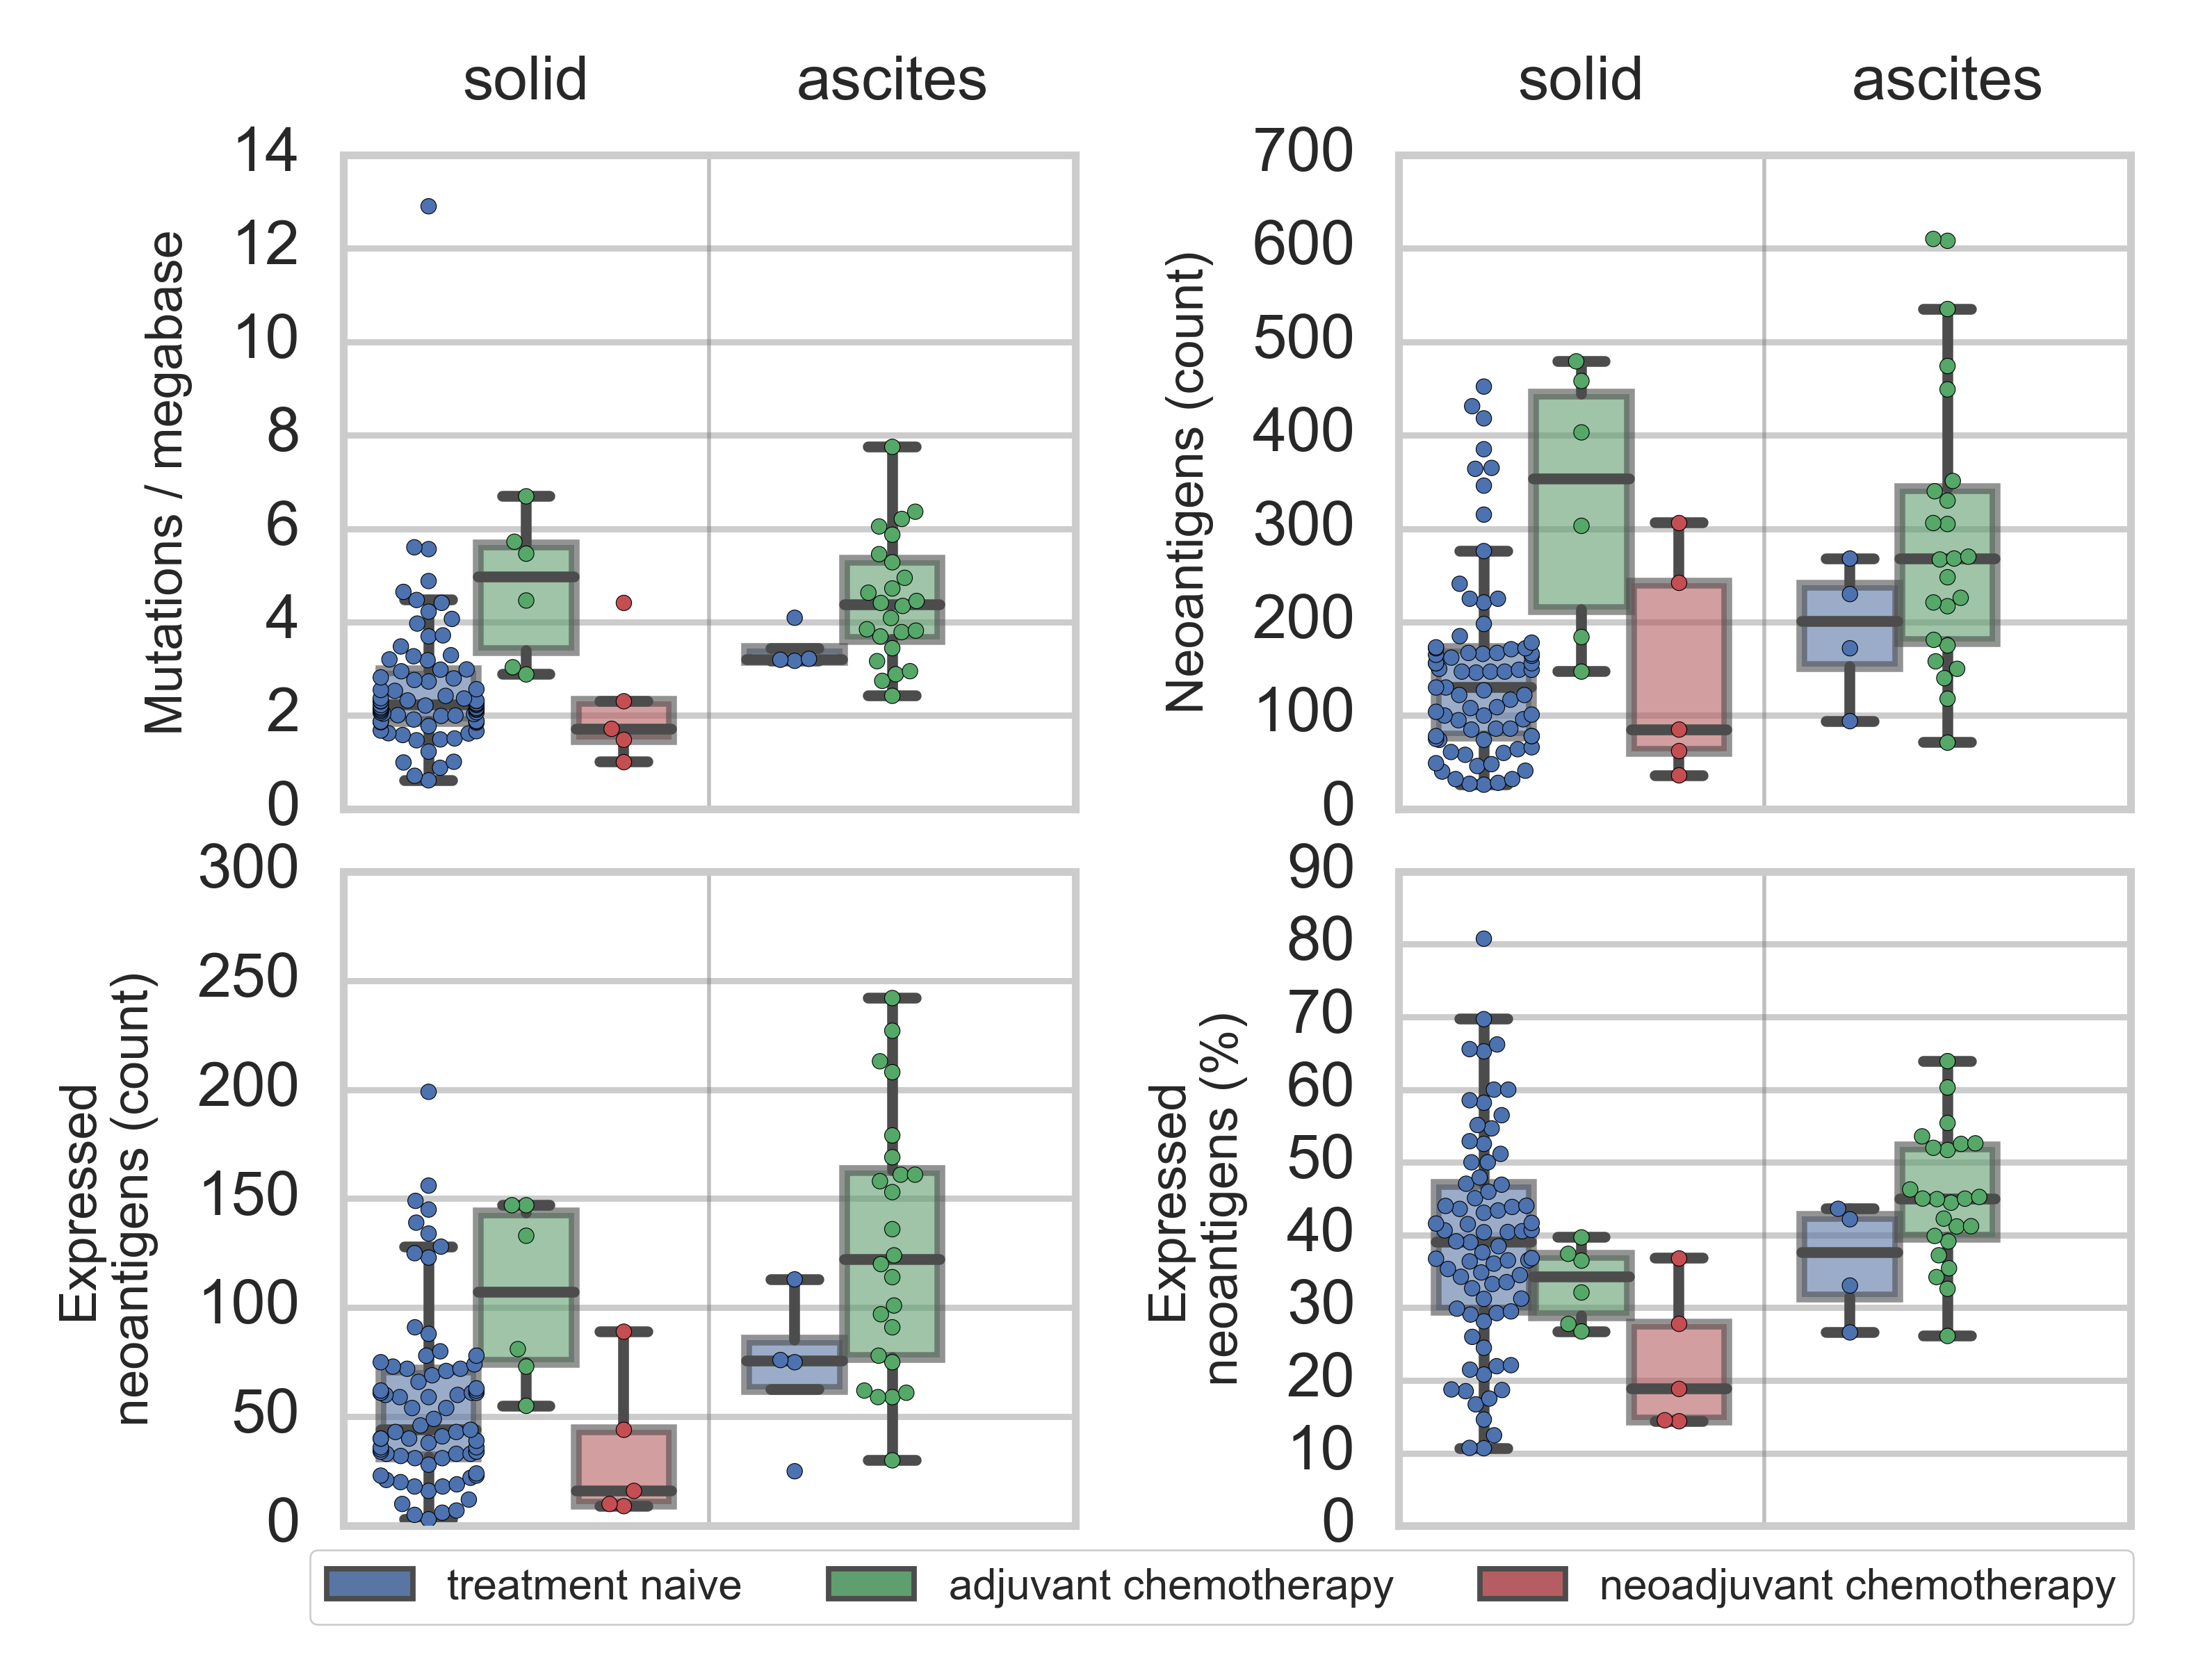

In [8]:
def format_figure():
    pyplot.xlabel("")
    pyplot.legend().remove()
    pyplot.ylim(ymin=0)
    pyplot.axvline(.5, color='gray', alpha=0.5, linewidth=0.5)
    pyplot.gca().xaxis.tick_top()

seaborn.set_context("paper")
seaborn.set_style("whitegrid")

ylabel_fontsize = "x-small"

pyplot.figure(figsize=(4,3))
grid=(2,2)
grid_points = [(row, col) for row in range(grid[0]) for col in range(grid[1])]
i = 0

def draw_boxplot(**kwargs):
    kwargs.update({
        'data': sources,
        'whis': None,
        'x': 'tissue_type',
        'hue': "specific_treatment",
        'fliersize': 0,
        'hue_order': ("treatment naive", "adjuvant chemotherapy", "neoadjuvant chemotherapy"),
    })
    seaborn.boxplot(**kwargs)
    seaborn.swarmplot(
        data=kwargs['data'],
        x=kwargs['x'],
        y=kwargs['y'],
        hue=kwargs['hue'],
        hue_order=kwargs['hue_order'],
        size=2,
        split=True,
        linewidth=0.10,
        edgecolor='black',
        #palette=dict((x, 'black') for x in kwargs['hue_order'])
        #color=("0.0"),
       )
    pyplot.setp(pyplot.gca().artists, alpha=.6)


axes = []
    
ax = pyplot.subplot2grid(grid,grid_points[i])
axes.append(ax)
#pyplot.title("A", loc="left")
draw_boxplot(y="mutations_per_mb")
format_figure()
#pyplot.legend(loc="upper center")
#pyplot.title("Total mutations")
pyplot.ylabel("Mutations / megabase", fontsize=ylabel_fontsize)
i += 1

# Legend
#ax_legend = pyplot.subplot2grid(grid,(0,0), colspan=2)
(handles, labels) = ax.get_legend_handles_labels()
ax.legend(
    handles[:3],
    labels[:3],
    loc="upper center",
    fancybox=True,
    frameon=True,
    framealpha=1,
    fontsize="xx-small",
    ncol=3,
    bbox_to_anchor=(1.2, -1.1)
)


ax = pyplot.subplot2grid(grid,grid_points[i])
axes.append(ax)
#pyplot.title("A", loc="left")
draw_boxplot(y="peptides")
format_figure()
#pyplot.legend(loc="upper right")
#pyplot.title("")
pyplot.ylabel("Neoantigens (count)", fontsize=ylabel_fontsize)
i += 1

ax = pyplot.subplot2grid(grid,grid_points[i]) # , sharex=axes[0])
axes.append(ax)
#pyplot.title("Expressed mutations")
#pyplot.title("B", loc="left")
#sub_data = sources[sources.cohort != "TCGA"]
sub_data = sources
draw_boxplot(y="expressed peptides")
format_figure()
#pyplot.title("Expressed neoantigens")
pyplot.ylabel("Expressed\nneoantigens (count)", fontsize=ylabel_fontsize)
pyplot.ylim(ymin=0, ymax=300)
ax.xaxis.set_major_formatter(pyplot.NullFormatter())
#ax.label_outer()
i += 1

ax = pyplot.subplot2grid(grid,grid_points[i]) #, sharex=axes[1])
axes.append(ax)
#pyplot.title("C", loc="left")
draw_boxplot(y="percent_peptides_expressed")
format_figure()
#pyplot.title("Fraction neoantigens expressed")
pyplot.ylabel("Expressed\nneoantigens (%)", fontsize=ylabel_fontsize)
ax.xaxis.set_major_formatter(pyplot.NullFormatter())
#ax.label_outer()
i += 1
pyplot.tight_layout(h_pad=0)

pyplot.savefig("../figures/counts.pdf")


In [9]:
sources.groupby(["donor", "specific_treatment"])['fraction_peptides_expressed'].mean()

donor     specific_treatment      
AOCS-001  treatment naive             0.581967
AOCS-004  treatment naive             0.344828
AOCS-005  treatment naive             0.600000
AOCS-034  adjuvant chemotherapy       0.462687
          treatment naive             0.353293
AOCS-055  treatment naive             0.529070
AOCS-056  treatment naive             0.106667
AOCS-057  treatment naive             0.469231
AOCS-058  treatment naive             0.214765
AOCS-059  treatment naive             0.585366
AOCS-060  treatment naive             0.652632
AOCS-061  treatment naive             0.294872
AOCS-063  treatment naive             0.367347
AOCS-064  adjuvant chemotherapy       0.372131
          treatment naive             0.167053
AOCS-065  adjuvant chemotherapy       0.516949
          treatment naive             0.600000
AOCS-075  treatment naive             0.551282
AOCS-076  treatment naive             0.406977
AOCS-077  neoadjuvant chemotherapy    0.188235
AOCS-078  treatment naive

In [10]:
(sources.ix[sources.cohort == "AOCS"].peptides / sources.ix[sources.cohort == "AOCS"].mutations).sort(inplace=False)

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


source_id
AOCS-083-1-7    0.004198
AOCS-092-3-3    0.004479
AOCS-092-1-6    0.005859
AOCS-144-1-3    0.007126
AOCS-113-1-5    0.007620
AOCS-107-1-4    0.007690
AOCS-169-1-0    0.008095
AOCS-155-3-5    0.008272
AOCS-004-1-5    0.008726
AOCS-160-1-6    0.009045
AOCS-123-1-7    0.009229
AOCS-159-1-9    0.009680
AOCS-170-1-8    0.009717
AOCS-170-3-5    0.009804
AOCS-105-1-9    0.010182
AOCS-005-1-8    0.010689
AOCS-157-1-3    0.010702
AOCS-166-1-2    0.010795
AOCS-059-1-8    0.011120
AOCS-055-1-7    0.011744
AOCS-162-1-1    0.012032
AOCS-085-1-2    0.012172
AOCS-084-1-X    0.012701
AOCS-061-1-8    0.012722
AOCS-096-1-7    0.013303
AOCS-149-1-7    0.013511
AOCS-115-1-0    0.013558
AOCS-126-1-5    0.013994
AOCS-112-1-2    0.014067
AOCS-076-1-3    0.014091
                  ...   
AOCS-114-1-8    0.024020
AOCS-034-1-0    0.024150
AOCS-095-3-1    0.024353
AOCS-150-8-X    0.024690
AOCS-093-3-6    0.025261
AOCS-064-1-6    0.025813
AOCS-064-3-3    0.026220
AOCS-139-1-5    0.027287
AOCS-116-1-3   

In [11]:
sources

RNA_ID   RNA biospecimen  \
source_id                                                
AOCS-001-1-7     ICGCDBDE20130916001      AOCS-001-2-0   
AOCS-004-1-5     ICGCDBDE20130916003      AOCS-004-2-9   
AOCS-005-1-8     ICGCDBDE20130916004      AOCS-005-2-1   
AOCS-034-1-0    ICGCDBLG2010050402TR      AOCS-034-2-4   
AOCS-034-3-8     ICGCDBDE20131122024      AOCS-034-4-1   
AOCS-055-1-7     ICGCDBDE20130916005      AOCS-055-2-0   
AOCS-056-1-X    ICGCDBLG2010062229TR      AOCS-056-2-3   
AOCS-057-1-2   EXTERNAOCS20140414001      AOCS-057-2-6   
AOCS-058-1-5    ICGCDBLG2010062235TR      AOCS-058-2-9   
AOCS-059-1-8     ICGCDBDE20130916006      AOCS-059-2-1   
AOCS-060-1-5     ICGCDBDE20130916007      AOCS-060-2-9   
AOCS-061-1-8     ICGCDBDE20130916008      AOCS-061-2-1   
AOCS-063-1-3     ICGCDBDE20130916009      AOCS-063-2-7   
AOCS-064-1-6    ICGCDBLG2010062214TR      AOCS-064-2-X   
AOCS-064-3-3    ICGCDBLG2010062215FR      AOCS-064-4-7   
AOCS-065-1-9    ICGCDBLG2010062219TR      AOCS-065-2-2   
AOCS-065-3-6    ICGCDBLG2010062220FR      AOCS-065-4-X   
AOCS-075-1-0     ICGCDBDE20130916010      AOCS-075-2-4   
AOCS-076-1-3     ICGCDBDE20130916011      AOCS-076-2-7   
AOCS-077-1-6     ICGCDBDE20130916012      AOCS-077-2-X   
AOCS-078-1-9     ICGCDBDE20130916013      AOCS-078-2-2   
AOCS-079-1-1     ICGCDBDE20130916014      AOCS-079-2-5   
AOCS-080-1-9    ICGCDBLG2010102737TR      AOCS-080-2-2   
AOCS-081-1-1     ICGCDBDE20130916015      AOCS-081-2-5   
AOCS-083-1-7     ICGCDBDE20130916016      AOCS-083-2-0   
AOCS-084-1-X     ICGCDBDE20130916017      AOCS-084-2-3   
AOCS-085-1-2     ICGCDBDE20130916018      AOCS-085-2-6   
AOCS-086-1-5    ICGCDBLG2010102755TR      AOCS-086-2-9   
AOCS-086-3-2    ICGCDBLG2010102759FR      AOCS-086-4-6   
AOCS-088-1-0    ICGCDBLG2010102757TR      AOCS-088-2-4   
...                              ...               ...   
AOCS-144-1-3     ICGCDBDE20131122034      AOCS-144-2-7   
AOCS-145-1-6     ICGCDBDE20131122006      AOCS-145-2-X   
AOCS-146-1-9     ICGCDBDE20131122007      AOCS-146-2-2   
AOCS-147-1-1     ICGCDBDE20131122035      AOCS-147-2-5   
AOCS-148-1-4     ICGCDBDE20131122008      AOCS-148-2-8   
AOCS-149-1-7     ICGCDBDE20131122009      AOCS-149-2-0   
AOCS-150-3-1     ICGCDBDE20130916040      AOCS-150-4-5   
AOCS-150-8-X   EXTERNAOCS20140414004     AOCS-150-10-7   
AOCS-152-1-X     ICGCDBDE20131122022      AOCS-152-2-3   
AOCS-153-1-2     ICGCDBDE20131122023      AOCS-153-2-6   
AOCS-155-3-5     ICGCDBDE20131122043      AOCS-155-4-9   
AOCS-157-1-3   EXTERNAOCS20140414005      AOCS-157-2-7   
AOCS-158-1-6   EXTERNAOCS20140414006      AOCS-158-2-X   
AOCS-159-1-9   EXTERNAOCS20140227002      AOCS-159-2-2   
AOCS-160-1-6   EXTERNAOCS20140414007      AOCS-160-2-X   
AOCS-161-1-9   EXTERNAOCS20140227003      AOCS-161-2-2   
AOCS-162-1-1   EXTERNAOCS20140227004      AOCS-162-2-5   
AOCS-163-1-4   EXTERNAOCS20140227005      AOCS-163-2-8   
AOCS-164-1-7   EXTERNAOCS20140227006      AOCS-164-2-0   
AOCS-165-1-X   EXTERNAOCS20140227007      AOCS-165-2-3   
AOCS-166-1-2   EXTERNAOCS20140227008      AOCS-166-2-6   
AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
AOCS-167-3-2   EXTERNAOCS20140227013      AOCS-167-4-6   
AOCS-168-1-8   EXTERNAOCS20140414008      AOCS-168-2-1   
AOCS-169-1-0   EXTERNAOCS20140414009      AOCS-169-2-4   
AOCS-170-1-8   EXTERNAOCS20140227017      AOCS-170-2-1   
AOCS-170-3-5   EXTERNAOCS20140227018      AOCS-170-4-9   
AOCS-171-1-0   EXTERNAOCS20140227014      AOCS-171-2-4   
AOCS-171-3-8   EXTERNAOCS20140227015      AOCS-171-4-1   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-001-1-7   AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7   
AOCS-004-1-5   AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5   
AOCS-005-1-8   AOCS_005_ICGC_DBPC_20130205_006    AOCS-005-1-8   
AOCS-034-1-0   AOCS_034_ICGC_DBPC_20130205_00

In [12]:
sources.ix[sources.donor == "AOCS-077"]

RNA_ID RNA biospecimen  \
source_id                                           
AOCS-077-1-6  ICGCDBDE20130916012    AOCS-077-2-X   

                                       DNA_id DNA_biospecimen  \
source_id                                                       
AOCS-077-1-6  AOCS_077_ICGC_DBPC_20130205_037    AOCS-077-1-6   

             specimen_type_description CollectionPoint SpecimenType  \
source_id                                                             
AOCS-077-1-6            primary tumour         Primary       Tumour   

                                                  RNA data file  \
source_id                                                         
AOCS-077-1-6  130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_077_I...   

                DNA_sample_string icgc_sample_id project_code_x  \
source_id                                                         
AOCS-077-1-6  ICGCDBPC20130205037       SA505492          OV-AU   

             submitted_sample_id icgc_specimen_id submitted_specimen_id_x  \
source_id                                                                   
AOCS-077-1-6        AOCS-077-1-6         SP101572              AOCS-077-1   

             icgc_donor_id_x submitted_donor_id_x  analyzed_sample_interval  \
source_id                                                                     
AOCS-077-1-6         DO46350             AOCS-077                    1779.0   

              percentage_cellularity_x level_of_cellularity_x  study  \
source_id                                                              
AOCS-077-1-6                      53.0                 41-60%  PCAWG   

             project_code_y study_specimen_involved_in  \
source_id                                                
AOCS-077-1-6          OV-AU                      PCAWG   

             submitted_specimen_id_y icgc_donor_id_y submitted_donor_id_y  \
source_id                                                                   
AOCS-077-1-6              AOCS-077-1         DO46350             AOCS-077   

                              specimen_type specimen_type_other  \
source_id                                                         
AOCS-077-1-6  Primary tumour - solid tissue                 NaN   

              specimen_interval specimen_donor_treatment_type  \
source_id                                                       
AOCS-077-1-6                 75                 other therapy   

             specimen_donor_treatment_type_other specimen_processing  \
source_id                                                              
AOCS-077-1-6            Surgery and Chemotherapy               fresh   

              specimen_processing_other     specimen_storage  \
source_id                                                      
AOCS-077-1-6                        NaN  frozen, vapor phase   

              specimen_storage_other tumour_confirmed  specimen_biobank  \
source_id                                                                 
AOCS-077-1-6                     NaN               no               NaN   

              specimen_biobank_id  specimen_available  \
source_id                                               
AOCS-077-1-6                  NaN                 NaN   

             tumour_histological_type tumour_grading_system  tumour_grade  \
source_id                                                                   
AOCS-077-1-6                   8441/3            Silverberg           3.0   

              tumour_grade_supplemental tumour_stage_system tumour_stage  \
source_id                                                                  
AOCS-077-1-6                        NaN                FIGO          III   

              tumour_stage_supplemental  digital_image_of_stained_section  \
source_id                                                                   
AOCS-077-1-6                        NaN                               NaN   

              percentage_cellularity_y level_of_cellularity_

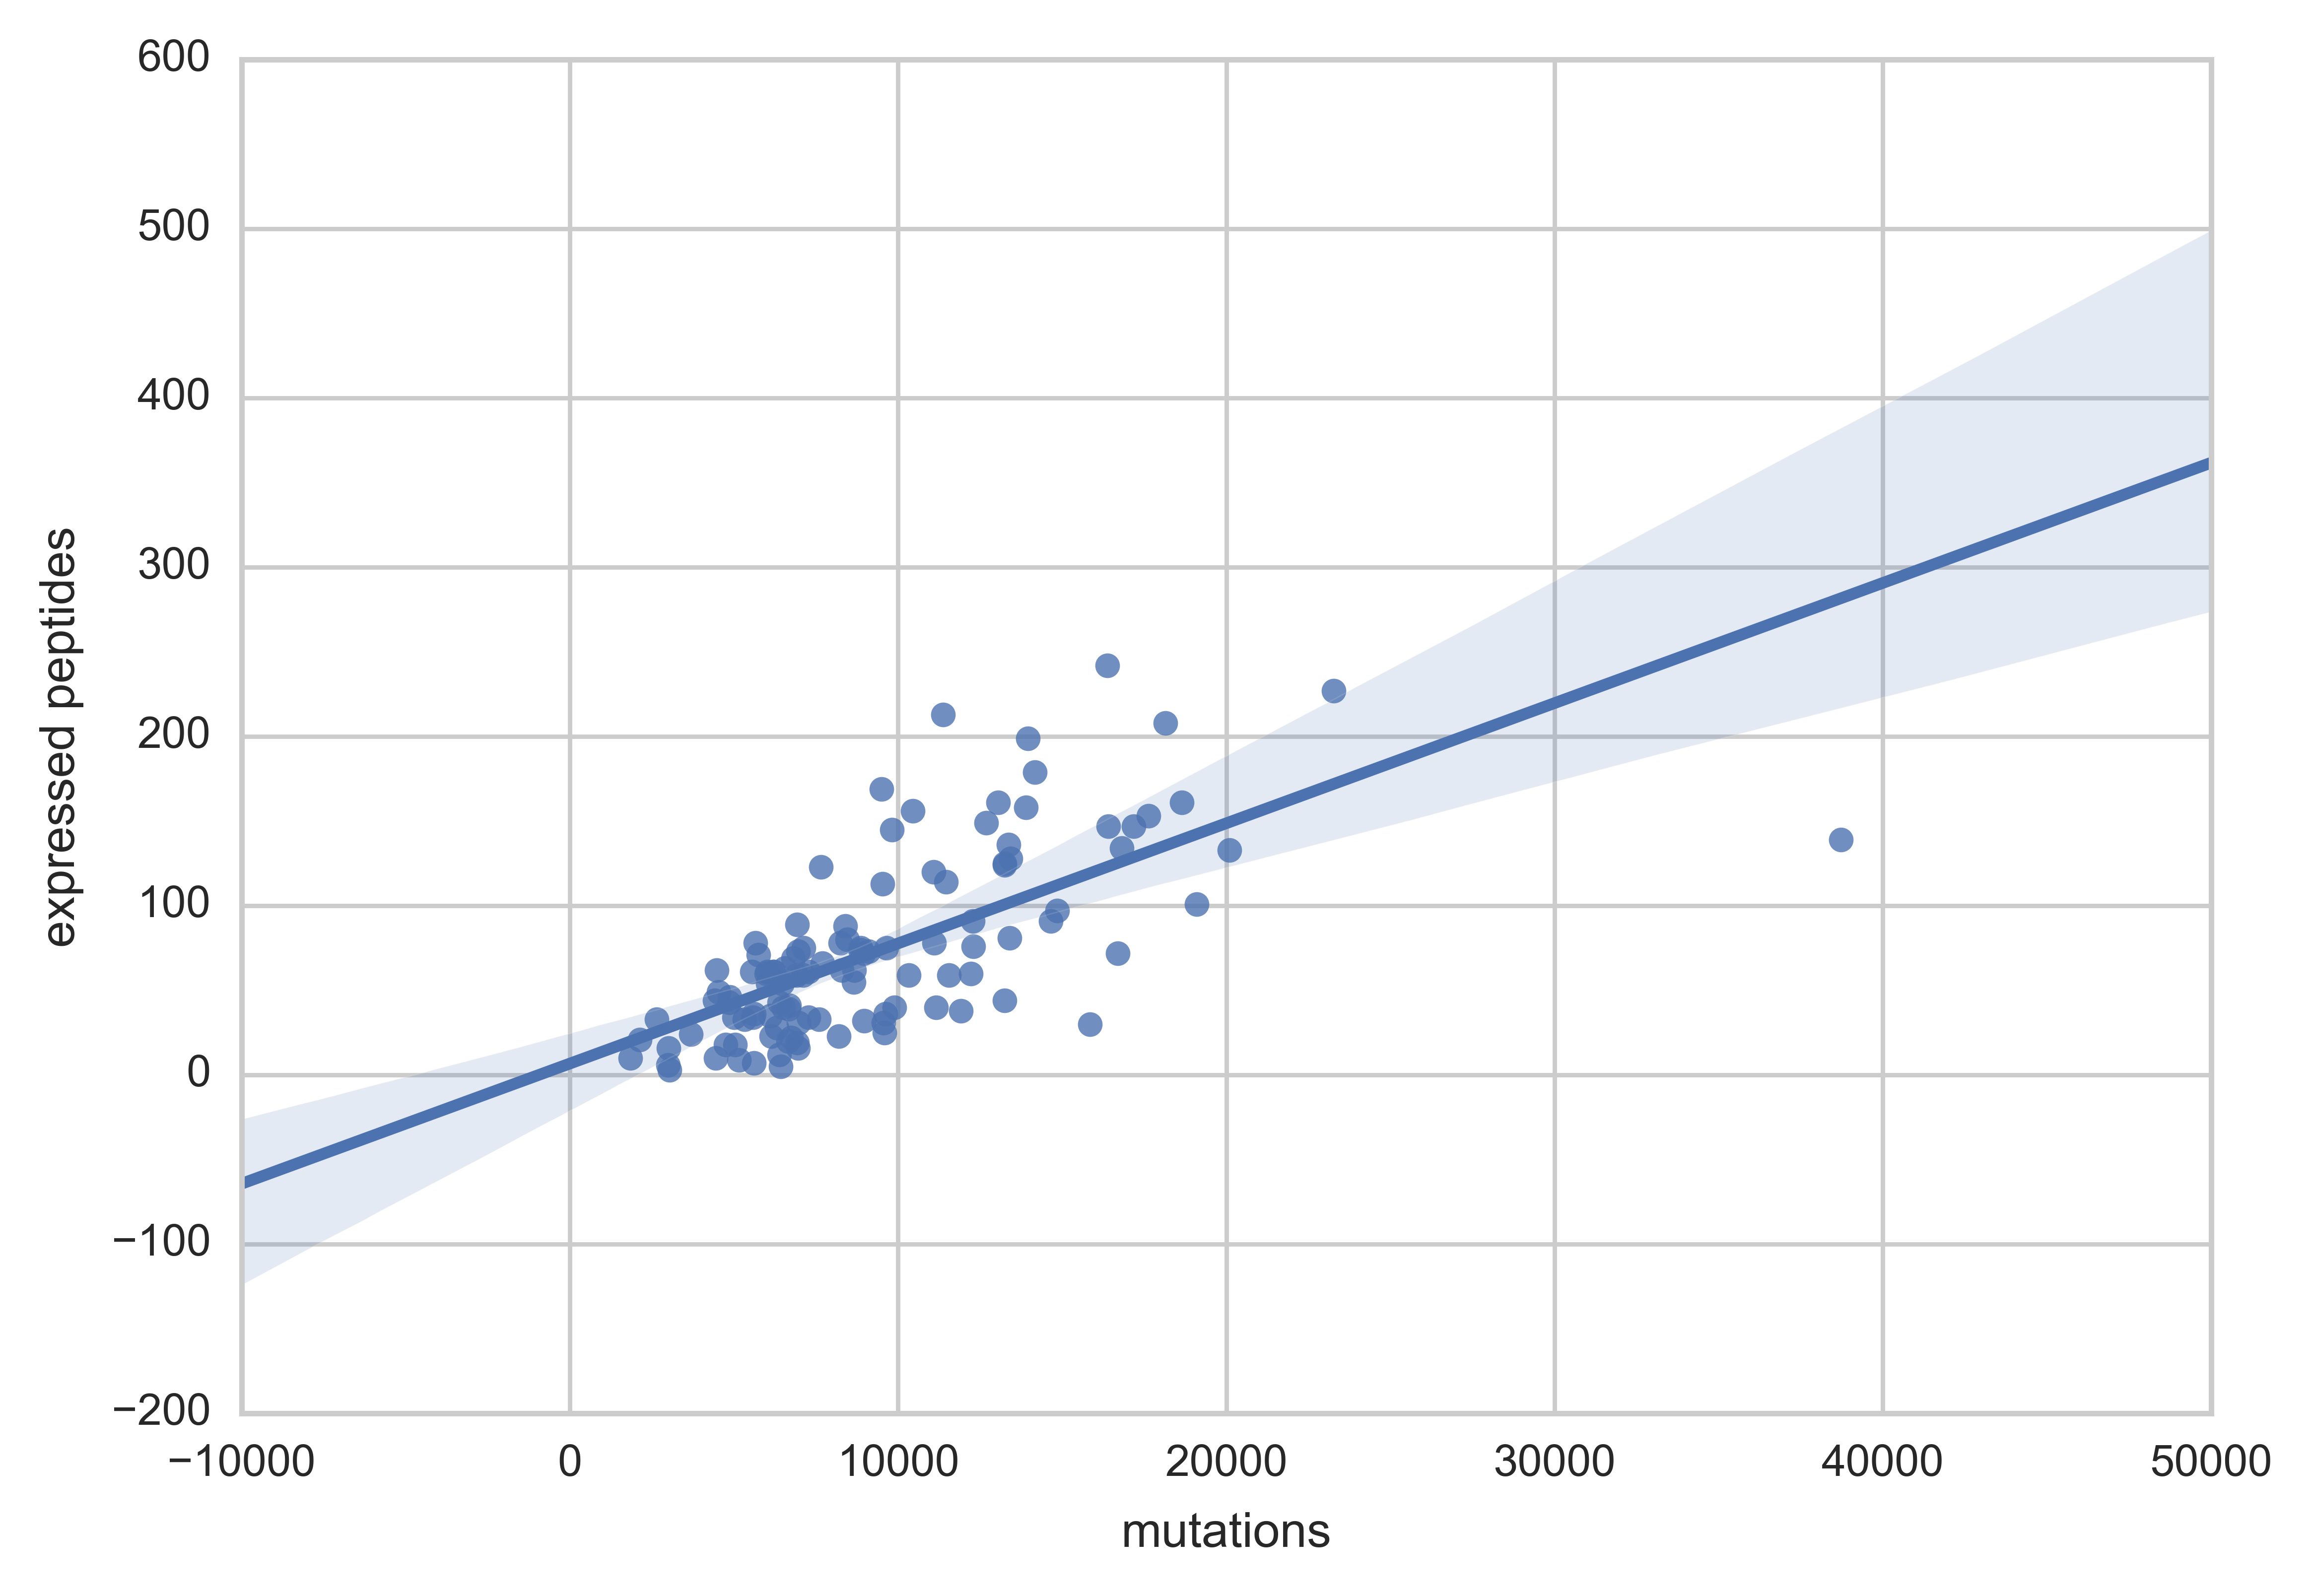

In [13]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"]["expressed peptides"])

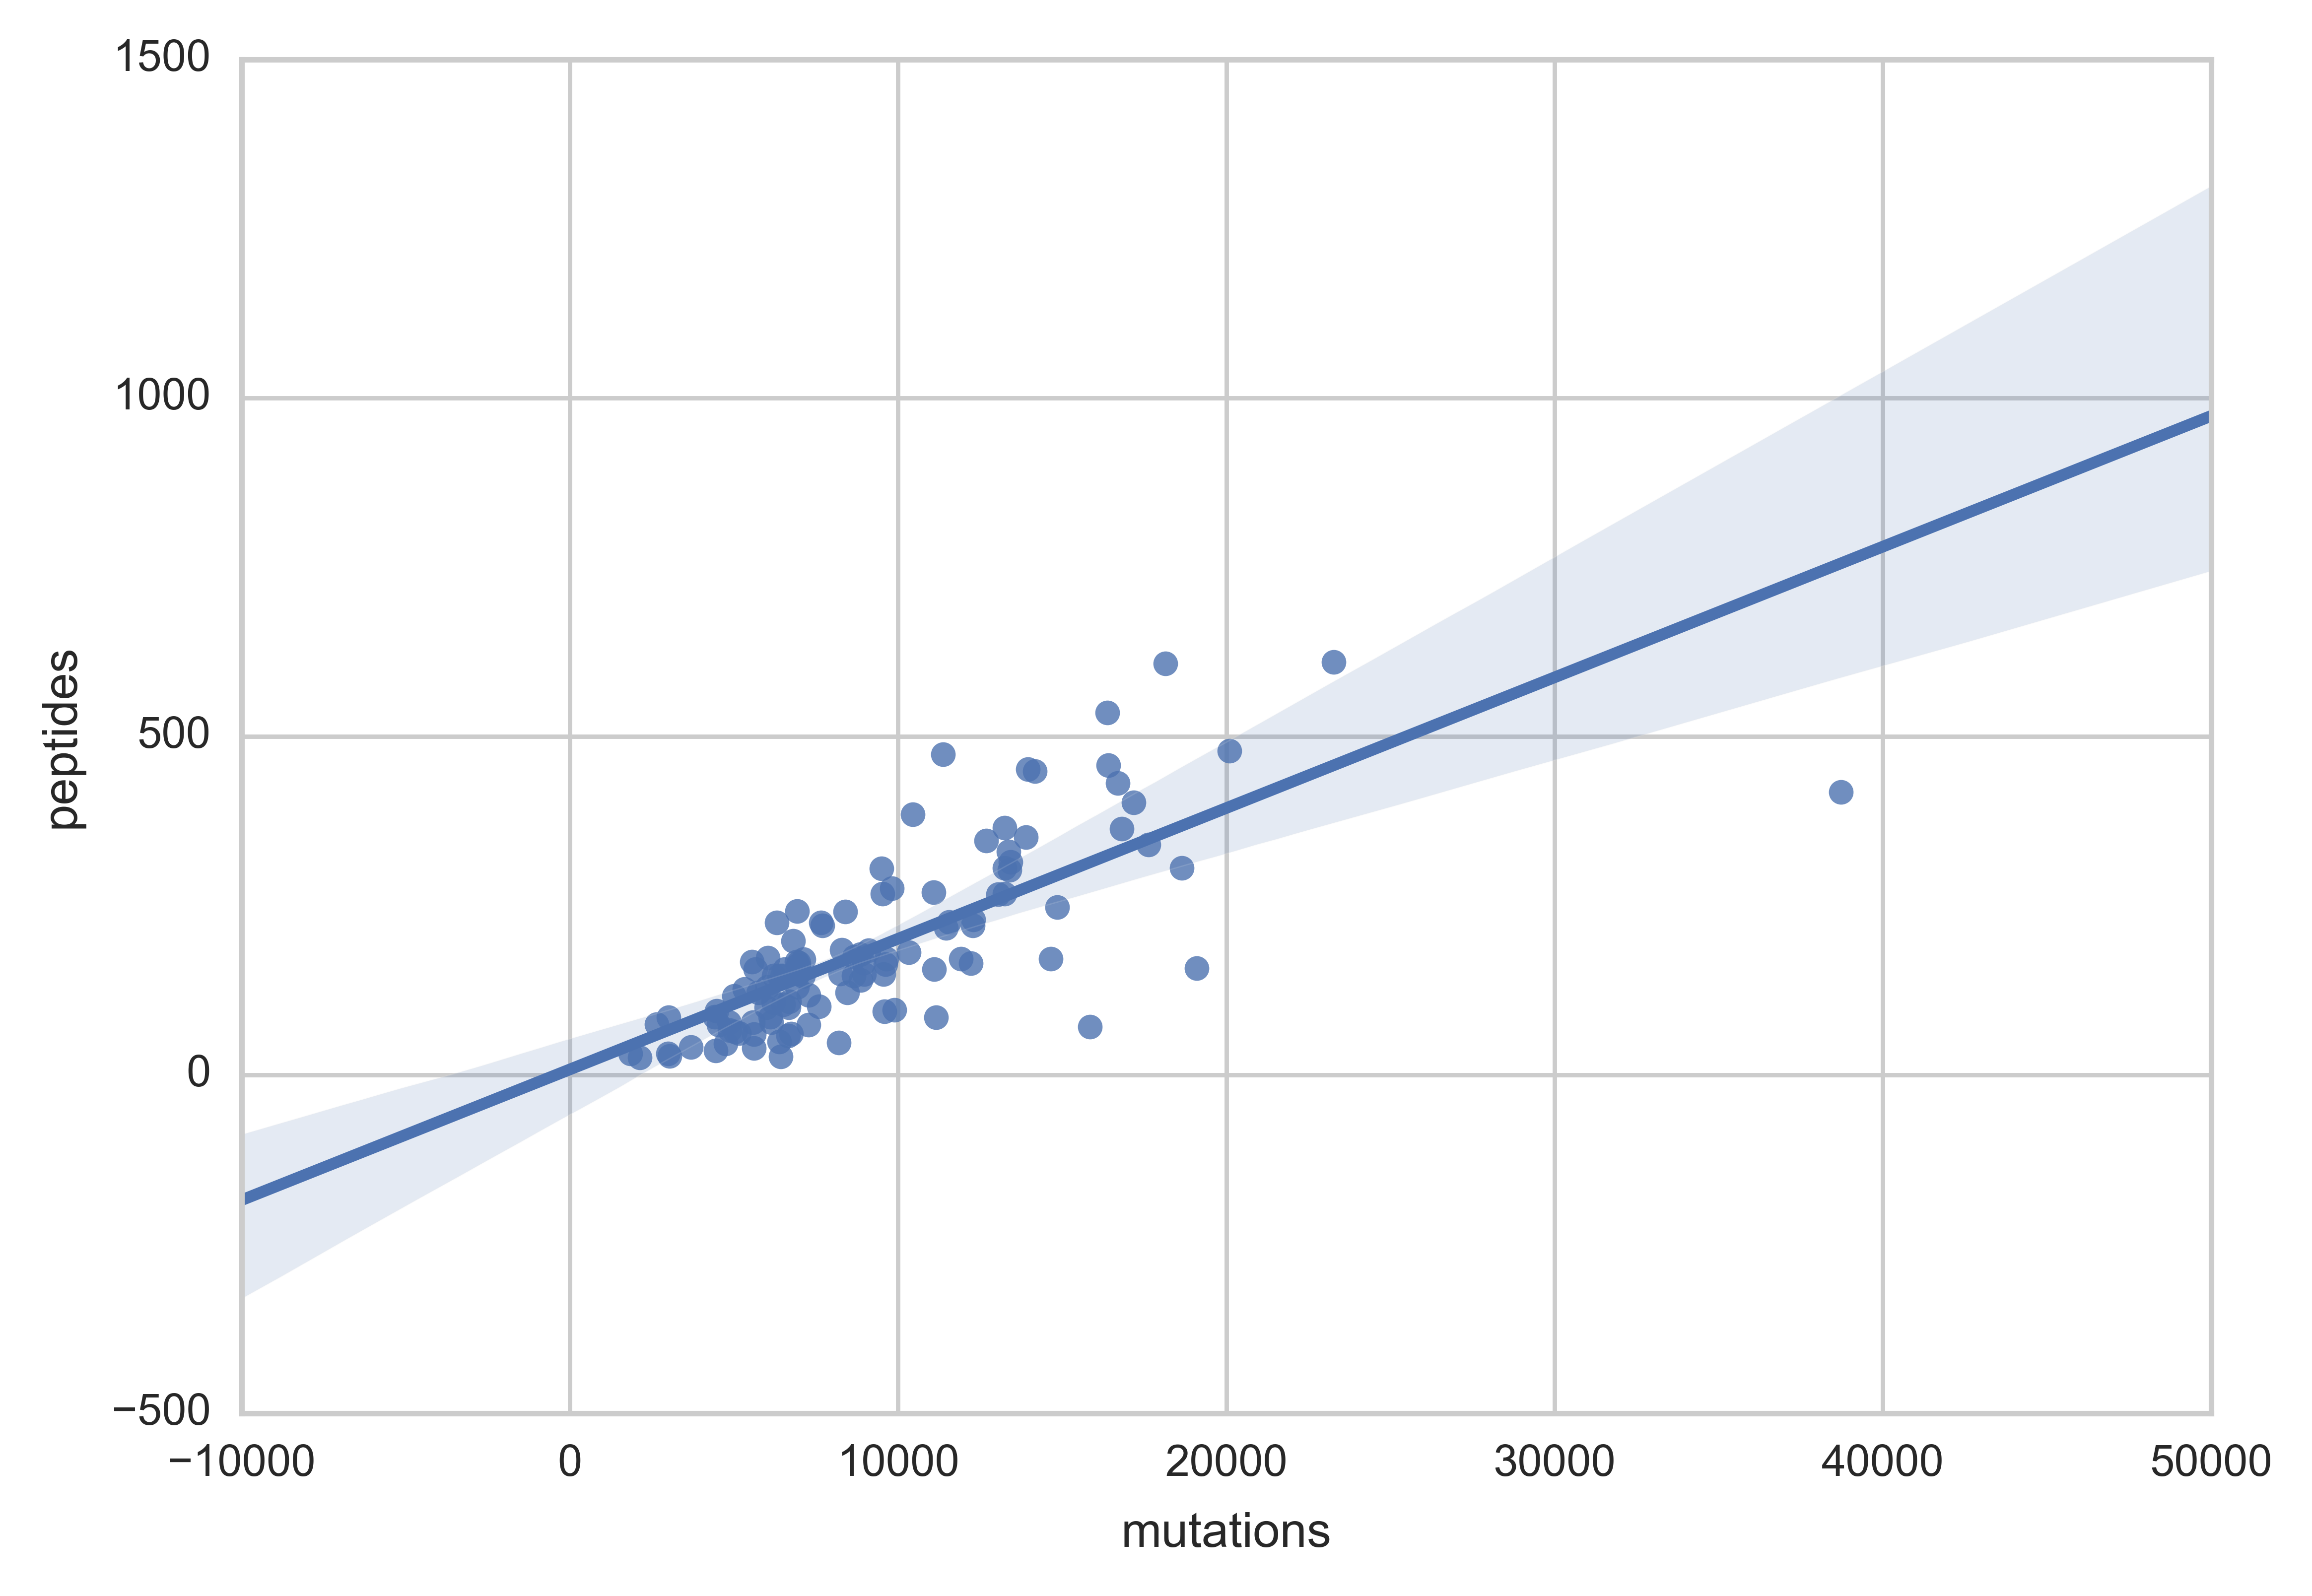

In [14]:
seaborn.regplot(sources.ix[sources.cohort == "AOCS"].mutations, sources.ix[sources.cohort == "AOCS"].peptides)

In [15]:
aocs_sources = sources.ix[sources.cohort == "AOCS"]

In [16]:
muts_confident.ix[1076674]

source_id                                           AOCS-150-8-X
donor                                                   AOCS-150
genome                                                    GRCh37
contig                                                         2
interbase_start                                      1.07762e+08
interbase_end                                        1.07762e+08
ref                                                            C
alt                                                            G
sources                  annotated_mutations annotated_mutations
effect                                                intergenic
gene                                                        None
context_5_prime                                  TCAGTGGGTGTGGGA
context_3_prime                                  CCTCTGAGCCAGGCA
context_mutation                                             C>G
binding_affinity                                             NaN
binding_allele           

In [17]:
aocs_muts = mutations.ix[mutations.donor.str.startswith("AOCS")]
aocs_muts_confident = muts_confident.ix[muts_confident.donor.str.startswith("AOCS")]
aocs_muts_confident_coding = aocs_muts_confident.ix[aocs_muts_confident.effect.str.startswith("p.")]
aocs_muts_confident_coding_expressed = aocs_muts_confident_coding.ix[aocs_muts_confident_coding.rna_alt_reads > 2]

non_exon_effects = [
    "intergenic",
    "intragenic",
    "intronic",
    "non-coding-transcript",
    "incomplete",
    "splice-acceptor",
    "splice-donor",
    "intronic-splice-site",
    "exonic-splice-site",
    "3' UTR",
    "5' UTR",
]

aocs_muts_confident_exon = aocs_muts_confident.ix[~ aocs_muts_confident.effect.isin(non_exon_effects)]
aocs_muts_exon = aocs_muts.ix[~ aocs_muts.effect.isin(non_exon_effects)]

[x for x in aocs_muts_confident_exon.effect.unique().tolist() if not x.startswith("p.")]

['silent']

In [18]:
treated_sources = set(sources.index[sources.treated])
len(treated_sources)

35

In [19]:
paired_treated_sources = set(sources.index[sources.treated & sources.timepoint_paired])

In [20]:
sources_with_unique_to_treated = set(mutations.ix[mutations.unique_to_treated].source_id.unique())

In [21]:
sub_exon = aocs_muts_confident_exon.ix[~ aocs_muts_confident_exon.source_id.isin(treated_sources)]
group_sum = sub_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = sub_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False     44      2.681818   118          0.009945      0.006568
      True     327      5.633028  1842          0.155247      0.048813
True  False   6328      1.565265  9905          0.834808      0.944619

In [22]:
sub_exon = aocs_muts_confident_exon.ix[aocs_muts_confident_exon.source_id.isin(treated_sources)]
group_sum = sub_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = sub_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False     36      3.055556   110          0.011336      0.007767
      True     208      7.365385  1532          0.157873      0.044876
True  False   4391      1.836028  8062          0.830791      0.947357

In [23]:
group_sum = aocs_muts_confident_exon.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_exon.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False     80      2.850000    228          0.010571      0.007058
      True     535      6.306542   3374          0.156428      0.047203
True  False  10719      1.676182  17967          0.833001      0.945738

In [24]:
group_sum = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per    sum  peptide fraction  mut fraction
snv   indel                                                            
False False     80      2.850000    228          0.010571      0.009234
      True     535      6.306542   3374          0.156428      0.061750
True  False   8049      2.232203  17967          0.833001      0.929017

In [25]:
group_sum = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.sum()
group_count = aocs_muts_confident_coding_expressed.groupby(["snv", "indel"]).num_binders.count()
df = pandas.DataFrame({"sum": group_sum, "count": group_count, "peptides per": group_sum / group_count})
df["peptide fraction"] = df["sum"] / df["sum"].sum()
df["mut fraction"] = df["count"] / df["count"].sum()
df

count  peptides per   sum  peptide fraction  mut fraction
snv   indel                                                           
False False     35      3.028571   106          0.012675      0.008933
      True      40      6.100000   244          0.029176      0.010209
True  False   3843      2.085090  8013          0.958149      0.980858

In [26]:
(muts_confident.ix[(muts_confident.donor == "AOCS-077") & (muts_confident.num_binders > 500)])

Empty DataFrame
Columns: [source_id, donor, genome, contig, interbase_start, interbase_end, ref, alt, sources, effect, gene, context_5_prime, context_3_prime, context_mutation, binding_affinity, binding_allele, dna_alt_reads, dna_ref_reads, dna_total_reads, rna_alt_reads, rna_ref_reads, rna_total_reads, context_mutation_3p5p, binding_peptides, num_binders, indel, snv, mnv, confident, vaf, any_alt_reads, mutation_id, site_id, unique_to_treated]
Index: []

In [27]:
(muts_confident.ix[muts_confident.donor.str.startswith("AOCS")].num_binders).describe()

count    1.070404e+06
mean     2.019144e-02
std      3.965331e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.600000e+01
Name: num_binders, dtype: float64

In [28]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

RNA_ID   RNA biospecimen  \
source_id                                                
AOCS-094-6-X     ICGCDBDE20130916020      AOCS-094-4-2   
AOCS-139-12-5    ICGCDBDE20131122037   AOCS-139-24-9MD   
AOCS-139-19-0    ICGCDBDE20131122039   AOCS-139-26-6MD   
AOCS-139-6-3     ICGCDBDE20131122041    AOCS-139-7-7MD   
AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-094-6-X   AOCS_094_ICGC_DBPC_20130205_066    AOCS-094-6-X   
AOCS-139-12-5  AOCS_139_ICGC_DBDE_20130729_002   AOCS-139-12-5   
AOCS-139-19-0  AOCS_139_ICGC_DBDE_20130729_003   AOCS-139-19-0   
AOCS-139-6-3   AOCS_139_ICGC_DBDE_20130729_001    AOCS-139-6-3   
AOCS-167-13-9  AOCS_167_ICGC_DBDE_20130904_024   AOCS-167-13-9   
AOCS-167-16-X  AOCS_167_ICGC_DBDE_20130904_027   AOCS-167-16-X   

                             specimen_type_description CollectionPoint  \
source_id                                                                
AOCS-094-6-X                   tumour local recurrence      Recurrence   
AOCS-139-12-5  tumour metastasis to distant location 3         Autopsy   
AOCS-139-19-0    tumour metastasis to distant location         Autopsy   
AOCS-139-6-3   tumour metastasis to distant location 2         Autopsy   
AOCS-167-13-9  tumour metastasis to distant location 2         Autopsy   
AOCS-167-16-X    tumour metastasis to distant location         Autopsy   

              SpecimenType                                      RNA data file  \
source_id                                                                       
AOCS-094-6-X        Tumour  130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_094_I...   
AOCS-139-12-5       Tumour  131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...   
AOCS-139-19-0       Tumour  131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...   
AOCS-139-6-3        Tumour  131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...   
AOCS-167-13-9       Tumour  140227_EXTERN_0128_AC2V5YACXX.nopd.AOCS_167_EX...   
AOCS-167-16-X       Tumour  140227_EXTERN_0128_AC2V5YACXX.nopd.AOCS_167_EX...   

                 DNA_sample_string icgc_sample_id project_code_x  \
source_id                                                          
AOCS-094-6-X   ICGCDBPC20130205066       SA505747          OV-AU   
AOCS-139-12-5  ICGCDBDE20130729002       SA505491          OV-AU   
AOCS-139-19-0  ICGCDBDE20130729003       SA505498          OV-AU   
AOCS-139-6-3   ICGCDBDE20130729001       SA505517          OV-AU   
AOCS-167-13-9  ICGCDBDE20130904024       SA505840          OV-AU   
AOCS-167-16-X  ICGCDBDE20130904027       SA505846          OV-AU   

              submitted_sample_id icgc_specimen_id submitted_specimen_id_x  \
source_id                                                                    
AOCS-094-6-X         AOCS-094-6-X         SP106641              AOCS-094-2   
AOCS-139-12-5       AOCS-139-12-5         SP101901             AOCS-139-17   
AOCS-139-19-0       AOCS-139-19-0         SP101906              AOCS-139-4   
AOCS-139-6-3         AOCS-139-6-3         SP101896             AOCS-139-16   
AOCS-167-13-9       AOCS-167-13-9         SP102148             AOCS-167-16   
AOCS-167-16-X       AOCS-167-16-X         SP102151              AOCS-167-4   

              icgc_donor_id_x submitted_donor_id_x  analyzed_sample_interval  \
source_id                                                                      
AOCS-094-6-X          DO46378             AOCS-094                    2478.0   
AOCS-139-12-5         DO46493             AOCS-139                      95.0   
AOCS-139-19-0         DO46493             AOCS-139                     103.0   
AOCS-139-6-3          DO46493             AOCS-139                      95.0   
AOCS-167-13-9         DO46593             AOCS-167                      41.0   
AOCS-167-16-X         DO46593             AOCS-167              

In [29]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "primary")]

RNA_ID RNA biospecimen  \
source_id                                             
AOCS-001-1-7    ICGCDBDE20130916001    AOCS-001-2-0   
AOCS-004-1-5    ICGCDBDE20130916003    AOCS-004-2-9   
AOCS-005-1-8    ICGCDBDE20130916004    AOCS-005-2-1   
AOCS-034-1-0   ICGCDBLG2010050402TR    AOCS-034-2-4   
AOCS-055-1-7    ICGCDBDE20130916005    AOCS-055-2-0   
AOCS-056-1-X   ICGCDBLG2010062229TR    AOCS-056-2-3   
AOCS-057-1-2  EXTERNAOCS20140414001    AOCS-057-2-6   
AOCS-058-1-5   ICGCDBLG2010062235TR    AOCS-058-2-9   
AOCS-059-1-8    ICGCDBDE20130916006    AOCS-059-2-1   
AOCS-060-1-5    ICGCDBDE20130916007    AOCS-060-2-9   
AOCS-061-1-8    ICGCDBDE20130916008    AOCS-061-2-1   
AOCS-063-1-3    ICGCDBDE20130916009    AOCS-063-2-7   
AOCS-064-1-6   ICGCDBLG2010062214TR    AOCS-064-2-X   
AOCS-065-1-9   ICGCDBLG2010062219TR    AOCS-065-2-2   
AOCS-075-1-0    ICGCDBDE20130916010    AOCS-075-2-4   
AOCS-076-1-3    ICGCDBDE20130916011    AOCS-076-2-7   
AOCS-077-1-6    ICGCDBDE20130916012    AOCS-077-2-X   
AOCS-078-1-9    ICGCDBDE20130916013    AOCS-078-2-2   
AOCS-079-1-1    ICGCDBDE20130916014    AOCS-079-2-5   
AOCS-080-1-9   ICGCDBLG2010102737TR    AOCS-080-2-2   
AOCS-081-1-1    ICGCDBDE20130916015    AOCS-081-2-5   
AOCS-083-1-7    ICGCDBDE20130916016    AOCS-083-2-0   
AOCS-084-1-X    ICGCDBDE20130916017    AOCS-084-2-3   
AOCS-085-1-2    ICGCDBDE20130916018    AOCS-085-2-6   
AOCS-086-1-5   ICGCDBLG2010102755TR    AOCS-086-2-9   
AOCS-088-1-0   ICGCDBLG2010102757TR    AOCS-088-2-4   
AOCS-090-1-0    ICGCDBDE20131122010    AOCS-090-2-4   
AOCS-091-1-3    ICGCDBDE20131122025    AOCS-091-2-7   
AOCS-092-1-6    ICGCDBDE20131122027    AOCS-092-2-X   
AOCS-093-1-9    ICGCDBDE20131122001    AOCS-093-2-2   
...                             ...             ...   
AOCS-126-1-5    ICGCDBDE20130916032    AOCS-126-2-9   
AOCS-128-1-0    ICGCDBDE20130916033    AOCS-128-2-4   
AOCS-130-1-0    ICGCDBDE20131122030    AOCS-130-2-4   
AOCS-131-1-3    ICGCDBDE20131122031    AOCS-131-2-7   
AOCS-132-1-6    ICGCDBDE20131122032    AOCS-132-2-X   
AOCS-133-1-9    ICGCDBDE20131122033    AOCS-133-2-2   
AOCS-139-1-5    ICGCDBDE20131122036    AOCS-139-2-9   
AOCS-143-1-0    ICGCDBDE20131122005    AOCS-143-2-4   
AOCS-144-1-3    ICGCDBDE20131122034    AOCS-144-2-7   
AOCS-145-1-6    ICGCDBDE20131122006    AOCS-145-2-X   
AOCS-146-1-9    ICGCDBDE20131122007    AOCS-146-2-2   
AOCS-147-1-1    ICGCDBDE20131122035    AOCS-147-2-5   
AOCS-148-1-4    ICGCDBDE20131122008    AOCS-148-2-8   
AOCS-149-1-7    ICGCDBDE20131122009    AOCS-149-2-0   
AOCS-152-1-X    ICGCDBDE20131122022    AOCS-152-2-3   
AOCS-153-1-2    ICGCDBDE20131122023    AOCS-153-2-6   
AOCS-157-1-3  EXTERNAOCS20140414005    AOCS-157-2-7   
AOCS-158-1-6  EXTERNAOCS20140414006    AOCS-158-2-X   
AOCS-159-1-9  EXTERNAOCS20140227002    AOCS-159-2-2   
AOCS-160-1-6  EXTERNAOCS20140414007    AOCS-160-2-X   
AOCS-161-1-9  EXTERNAOCS20140227003    AOCS-161-2-2   
AOCS-162-1-1  EXTERNAOCS20140227004    AOCS-162-2-5   
AOCS-163-1-4  EXTERNAOCS20140227005    AOCS-163-2-8   
AOCS-164-1-7  EXTERNAOCS20140227006    AOCS-164-2-0   
AOCS-165-1-X  EXTERNAOCS20140227007    AOCS-165-2-3   
AOCS-166-1-2  EXTERNAOCS20140227008    AOCS-166-2-6   
AOCS-168-1-8  EXTERNAOCS20140414008    AOCS-168-2-1   
AOCS-169-1-0  EXTERNAOCS20140414009    AOCS-169-2-4   
AOCS-170-1-8  EXTERNAOCS20140227017    AOCS-170-2-1   
AOCS-171-1-0  EXTERNAOCS20140227014    AOCS-171-2-4   

                                       DNA_id DNA_biospecimen  \
source_id                                                       
AOCS-001-1-7  AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7   
AOCS-004-1-5  AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5   
AOCS-005-1-8  AOCS_005_ICGC_DBPC_20130205_006    AOCS-005-1-8   
AOCS-034-1-0  AOCS_034_ICGC_DBPC_20130205_009    AOCS-034-1-0   
AOCS-055-1-7  AOCS_055_ICGC_DBPC_20130205_011    AOCS-055-1-7   
AOCS-056-1-X  AOCS_056_ICGC_DBPC_20130205_013    AOCS-056-1-X   
AOCS-057-1-2  AOCS_057_ICGC_DBPC_20130205_0

In [30]:
sources.ix[(sources.cohort == "AOCS") & (sources.tissue_type == "solid") & (sources.timepoint == "recurrence")]

RNA_ID   RNA biospecimen  \
source_id                                                
AOCS-094-6-X     ICGCDBDE20130916020      AOCS-094-4-2   
AOCS-139-12-5    ICGCDBDE20131122037   AOCS-139-24-9MD   
AOCS-139-19-0    ICGCDBDE20131122039   AOCS-139-26-6MD   
AOCS-139-6-3     ICGCDBDE20131122041    AOCS-139-7-7MD   
AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-094-6-X   AOCS_094_ICGC_DBPC_20130205_066    AOCS-094-6-X   
AOCS-139-12-5  AOCS_139_ICGC_DBDE_20130729_002   AOCS-139-12-5   
AOCS-139-19-0  AOCS_139_ICGC_DBDE_20130729_003   AOCS-139-19-0   
AOCS-139-6-3   AOCS_139_ICGC_DBDE_20130729_001    AOCS-139-6-3   
AOCS-167-13-9  AOCS_167_ICGC_DBDE_20130904_024   AOCS-167-13-9   
AOCS-167-16-X  AOCS_167_ICGC_DBDE_20130904_027   AOCS-167-16-X   

                             specimen_type_description CollectionPoint  \
source_id                                                                
AOCS-094-6-X                   tumour local recurrence      Recurrence   
AOCS-139-12-5  tumour metastasis to distant location 3         Autopsy   
AOCS-139-19-0    tumour metastasis to distant location         Autopsy   
AOCS-139-6-3   tumour metastasis to distant location 2         Autopsy   
AOCS-167-13-9  tumour metastasis to distant location 2         Autopsy   
AOCS-167-16-X    tumour metastasis to distant location         Autopsy   

              SpecimenType                                      RNA data file  \
source_id                                                                       
AOCS-094-6-X        Tumour  130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_094_I...   
AOCS-139-12-5       Tumour  131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...   
AOCS-139-19-0       Tumour  131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...   
AOCS-139-6-3        Tumour  131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_139_IC...   
AOCS-167-13-9       Tumour  140227_EXTERN_0128_AC2V5YACXX.nopd.AOCS_167_EX...   
AOCS-167-16-X       Tumour  140227_EXTERN_0128_AC2V5YACXX.nopd.AOCS_167_EX...   

                 DNA_sample_string icgc_sample_id project_code_x  \
source_id                                                          
AOCS-094-6-X   ICGCDBPC20130205066       SA505747          OV-AU   
AOCS-139-12-5  ICGCDBDE20130729002       SA505491          OV-AU   
AOCS-139-19-0  ICGCDBDE20130729003       SA505498          OV-AU   
AOCS-139-6-3   ICGCDBDE20130729001       SA505517          OV-AU   
AOCS-167-13-9  ICGCDBDE20130904024       SA505840          OV-AU   
AOCS-167-16-X  ICGCDBDE20130904027       SA505846          OV-AU   

              submitted_sample_id icgc_specimen_id submitted_specimen_id_x  \
source_id                                                                    
AOCS-094-6-X         AOCS-094-6-X         SP106641              AOCS-094-2   
AOCS-139-12-5       AOCS-139-12-5         SP101901             AOCS-139-17   
AOCS-139-19-0       AOCS-139-19-0         SP101906              AOCS-139-4   
AOCS-139-6-3         AOCS-139-6-3         SP101896             AOCS-139-16   
AOCS-167-13-9       AOCS-167-13-9         SP102148             AOCS-167-16   
AOCS-167-16-X       AOCS-167-16-X         SP102151              AOCS-167-4   

              icgc_donor_id_x submitted_donor_id_x  analyzed_sample_interval  \
source_id                                                                      
AOCS-094-6-X          DO46378             AOCS-094                    2478.0   
AOCS-139-12-5         DO46493             AOCS-139                      95.0   
AOCS-139-19-0         DO46493             AOCS-139                     103.0   
AOCS-139-6-3          DO46493             AOCS-139                      95.0   
AOCS-167-13-9         DO46593             AOCS-167                      41.0   
AOCS-167-16-X         DO46593             AOCS-167              

In [31]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides", "fraction_peptides_expressed"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            #sub_sources = sub_sources.ix[sub_sources["expressed peptides"] > 0]
            p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                     sub_sources[sub_sources.treated][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num treated"].append(sub_sources[sub_sources.treated][item].dropna().shape[0])
            p_df["num untreated"].append(sub_sources[~ sub_sources.treated][item].dropna().shape[0])
            p_df["treated"].append(sub_sources[sub_sources.treated][item].mean())
            p_df["treated range"].append(bootstrap(sub_sources[sub_sources.treated][item]))
            p_df["untreated"].append(sub_sources[~ sub_sources.treated][item].mean())
            p_df["untreated range"].append(bootstrap(sub_sources[~ sub_sources.treated][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.treated < row.untreated else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["untreated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.untreated,) + row["untreated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["treated"] = ["%0.2f (%0.2f-%0.2f)" % ((row.treated,) + row["treated range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {
        "mutations_per_mb": "mutations / mb",
        "fraction_peptides_expressed": "fraction expressed",

    }.get(x, x))

p_df_latex = p_df_latex[["tissue_type", "item", "num untreated", "untreated", "num treated", "treated", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
\begin{tabular}{llrlrll}
\toprule
        &                    &  num untreated &               untreated &  num treated &                 treated &            p-value \\
tissue\_type & item &                &                         &              &                         &                    \\
\midrule
ascites & mutations / mb &              4 &        3.42 (3.18-3.65) &           24 &        4.47 (4.05-4.91) &              0.158 \\
        & peptides &              4 &  191.00 (133.00-244.25) &           24 &  292.42 (245.29-342.09) &              0.212 \\
        & expressed peptides &              4 &     72.25 (49.85-94.50) &           24 &  128.25 (109.16-147.63) &              0.088 \\
        & fraction expressed &              4 &        0.36 (0.30-0.43) &           24 &        0.45 (0.42-0.48) &              0.094 \\
solid & mutations / mb &             75 &        2.62 (2.34-2.94) &           11 &        3.56 (2.68-4.44) &              0.112 \\
        & peptides &  

num untreated               untreated  \
tissue_type item                                                        
ascites     mutations / mb                  4        3.42 (3.18-3.65)   
            peptides                        4  191.00 (133.00-244.25)   
            expressed peptides              4     72.25 (49.85-94.50)   
            fraction expressed              4        0.36 (0.30-0.43)   
solid       mutations / mb                 75        2.62 (2.34-2.94)   
            peptides                       75  148.35 (130.48-167.63)   
            expressed peptides             75     56.03 (48.64-63.79)   
            fraction expressed             75        0.39 (0.36-0.42)   

                                num treated                 treated  \
tissue_type item                                                      
ascites     mutations / mb               24        4.47 (4.05-4.91)   
            peptides                     24  292.42 (245.29-342.09)   
            expressed peptides           24  128.25 (109.16-147.63)   
            fraction expressed           24        0.45 (0.42-0.48)   
solid       mutations / mb               11        3.56 (2.68-4.44)   
            peptides                     11  245.91 (173.27-321.19)   
            expressed peptides           11     73.09 (48.64-98.91)   
            fraction expressed           11        0.28 (0.24-0.33)   

                                          p-value  
tissue_type item                                   
ascites     mutations / mb                  0.158  
            peptides                        0.212  
            expressed peptides              0.088  
            fraction expressed              0.094  
solid       mutations / mb                  0.112  
            peptides                        0.054  
            expressed peptides              0.289  
            fraction expressed  0.014* (decrease)

In [32]:
p_df = collections.defaultdict(list)
for cohort in ["AOCS"]:
    print(cohort)
    for tissue_type in ["ascites", "solid"]:
        for item in ["mutations_per_mb", "peptides", "expressed peptides"]:
            #sub_sources = sources[sources.group == group]
            sub_sources = sources[(sources.tissue_type == tissue_type) & (sources.cohort == cohort)]
            p_value = scipy.stats.mannwhitneyu(sub_sources[sub_sources.timepoint == "primary"][item],
                                     sub_sources[sub_sources.timepoint != "primary"][item],
                 alternative="two-sided")
            #print(cohort, tissue_type, item, p_value)
            p_df["tissue_type"].append(tissue_type)
            p_df["item"].append(item)
            p_df["cohort"].append(cohort)
            p_df["p-value"].append(p_value.pvalue)
            p_df["num recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].dropna().shape[0])
            p_df["num primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].dropna().shape[0])
            p_df["recurrence"].append(sub_sources[sub_sources.timepoint != "primary"][item].mean())
            p_df["recurrence range"].append(bootstrap(sub_sources[sub_sources.timepoint != "primary"][item]))
            p_df["primary"].append(sub_sources[sub_sources.timepoint == "primary"][item].mean())
            p_df["primary range"].append(bootstrap(sub_sources[sub_sources.timepoint == "primary"][item]))


p_df = pandas.DataFrame(p_df).dropna()

p_df_latex = p_df.copy()
del p_df_latex["cohort"]
p_df_latex["p-value"] = [
    "%0.3f%s%s" % (
        row['p-value'], '*' if row['p-value'] < .05 else '', " (decrease)" if row.recurrence < row.primary else '')
    for (_, row) in p_df_latex.iterrows()
]
p_df_latex["primary"] = ["%0.1f (%0.1f-%0.1f)" % ((row.primary,) + row["primary range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex["recurrence"] = ["%0.1f (%0.1f-%0.1f)" % ((row.recurrence,) + row["recurrence range"]) for (_, row) in p_df_latex.iterrows()]
p_df_latex.item = p_df_latex.item.map(lambda x: {"mutations_per_mb": "mutations / mb"}.get(x, x))
p_df_latex = p_df_latex[["tissue_type", "item", "num primary", "primary", "num recurrence", "recurrence", "p-value"]]
p_df_latex = p_df_latex.set_index(["tissue_type", "item"])
print(p_df_latex.to_latex(index=True))
p_df_latex

AOCS
\begin{tabular}{llrlrll}
\toprule
        &                    &  num primary &              primary &  num recurrence &           recurrence & p-value \\
tissue\_type & item &              &                      &                 &                      &         \\
\midrule
ascites & mutations / mb &            4 &        3.4 (3.2-3.7) &              24 &        4.5 (4.0-4.9) &   0.158 \\
        & peptides &            4 &  191.0 (133.0-244.0) &              24 &  292.4 (245.5-343.2) &   0.212 \\
        & expressed peptides &            4 &     72.2 (47.0-94.5) &              24 &  128.2 (109.0-148.6) &   0.088 \\
solid & mutations / mb &           80 &        2.6 (2.3-2.9) &               6 &        4.7 (3.7-5.6) &  0.001* \\
        & peptides &           80 &  148.2 (130.6-167.1) &               6 &  329.0 (240.7-413.7) &  0.003* \\
        & expressed peptides &           80 &     54.6 (47.5-61.9) &               6 &   106.0 (80.7-131.3) &  0.005* \\
\bottomrule
\end{tabula

num primary              primary  \
tissue_type item                                                   
ascites     mutations / mb                4        3.4 (3.2-3.7)   
            peptides                      4  191.0 (133.0-244.0)   
            expressed peptides            4     72.2 (47.0-94.5)   
solid       mutations / mb               80        2.6 (2.3-2.9)   
            peptides                     80  148.2 (130.6-167.1)   
            expressed peptides           80     54.6 (47.5-61.9)   

                                num recurrence           recurrence p-value  
tissue_type item                                                             
ascites     mutations / mb                  24        4.5 (4.0-4.9)   0.158  
            peptides                        24  292.4 (245.5-343.2)   0.212  
            expressed peptides              24  128.2 (109.0-148.6)   0.088  
solid       mutations / mb                   6        4.7 (3.7-5.6)  0.001*  
            peptides                         6  329.0 (240.7-413.7)  0.003*  
            expressed peptides               6   106.0 (80.7-131.3)  0.005*

In [33]:
print(p_df_latex.to_latex(index=True))
p_df_latex

\begin{tabular}{llrlrll}
\toprule
        &                    &  num primary &              primary &  num recurrence &           recurrence & p-value \\
tissue\_type & item &              &                      &                 &                      &         \\
\midrule
ascites & mutations / mb &            4 &        3.4 (3.2-3.7) &              24 &        4.5 (4.0-4.9) &   0.158 \\
        & peptides &            4 &  191.0 (133.0-244.0) &              24 &  292.4 (245.5-343.2) &   0.212 \\
        & expressed peptides &            4 &     72.2 (47.0-94.5) &              24 &  128.2 (109.0-148.6) &   0.088 \\
solid & mutations / mb &           80 &        2.6 (2.3-2.9) &               6 &        4.7 (3.7-5.6) &  0.001* \\
        & peptides &           80 &  148.2 (130.6-167.1) &               6 &  329.0 (240.7-413.7) &  0.003* \\
        & expressed peptides &           80 &     54.6 (47.5-61.9) &               6 &   106.0 (80.7-131.3) &  0.005* \\
\bottomrule
\end{tabular}



num primary              primary  \
tissue_type item                                                   
ascites     mutations / mb                4        3.4 (3.2-3.7)   
            peptides                      4  191.0 (133.0-244.0)   
            expressed peptides            4     72.2 (47.0-94.5)   
solid       mutations / mb               80        2.6 (2.3-2.9)   
            peptides                     80  148.2 (130.6-167.1)   
            expressed peptides           80     54.6 (47.5-61.9)   

                                num recurrence           recurrence p-value  
tissue_type item                                                             
ascites     mutations / mb                  24        4.5 (4.0-4.9)   0.158  
            peptides                        24  292.4 (245.5-343.2)   0.212  
            expressed peptides              24  128.2 (109.0-148.6)   0.088  
solid       mutations / mb                   6        4.7 (3.7-5.6)  0.001*  
            peptides                         6  329.0 (240.7-413.7)  0.003*  
            expressed peptides               6   106.0 (80.7-131.3)  0.005*

In [34]:
p_df = collections.defaultdict(list)
for item in ["peptides", "mutations_per_mb"]:
    for group in ["AOCS solid", "AOCS ascites", "TCGA solid", "PT189 solid"]:
        #sub_sources = sources[sources.group == group]
        sub_sources = sources
        p_value = scipy.stats.mannwhitneyu(sub_sources[~ sub_sources.treated][item],
                                 sub_sources[sub_sources.treated][item],
             alternative="two-sided")
        print(group, item, p_value)
        p_df["item"].append(item)
        p_df["group"].append(group)
        p_df["p-value"].append(p_value.pvalue)

p_df = pandas.DataFrame(p_df)
p_df
print(p_df.ix[p_df.item == "neoantigens"][["group", "p-value"]].to_latex(index=False))
p_df[["group", "p-value"]]
p_df

AOCS solid peptides MannwhitneyuResult(statistic=645.5, pvalue=6.0452522208424821e-06)
AOCS ascites peptides MannwhitneyuResult(statistic=645.5, pvalue=6.0452522208424821e-06)
TCGA solid peptides MannwhitneyuResult(statistic=645.5, pvalue=6.0452522208424821e-06)
PT189 solid peptides MannwhitneyuResult(statistic=645.5, pvalue=6.0452522208424821e-06)
AOCS solid mutations_per_mb MannwhitneyuResult(statistic=551.0, pvalue=3.3078851387477689e-07)
AOCS ascites mutations_per_mb MannwhitneyuResult(statistic=551.0, pvalue=3.3078851387477689e-07)
TCGA solid mutations_per_mb MannwhitneyuResult(statistic=551.0, pvalue=3.3078851387477689e-07)
PT189 solid mutations_per_mb MannwhitneyuResult(statistic=551.0, pvalue=3.3078851387477689e-07)
\begin{tabular}{lr}
\toprule
Empty DataFrame
Columns: Index(['group', 'p-value'], dtype='object')
Index: Int64Index([], dtype='int64') \\
\bottomrule
\end{tabular}



group              item       p-value
0    AOCS solid          peptides  6.045252e-06
1  AOCS ascites          peptides  6.045252e-06
2    TCGA solid          peptides  6.045252e-06
3   PT189 solid          peptides  6.045252e-06
4    AOCS solid  mutations_per_mb  3.307885e-07
5  AOCS ascites  mutations_per_mb  3.307885e-07
6    TCGA solid  mutations_per_mb  3.307885e-07
7   PT189 solid  mutations_per_mb  3.307885e-07

In [35]:
#seaborn.boxplot(data=sources[sources.cohort == "AOCS"], x="group", y="interesting mutations", hue="treatment", hue_order=("treatment naive", "chemo treated"))


In [36]:
mutations.ix[mutations.binding_affinity > 0].shape

(10622, 34)

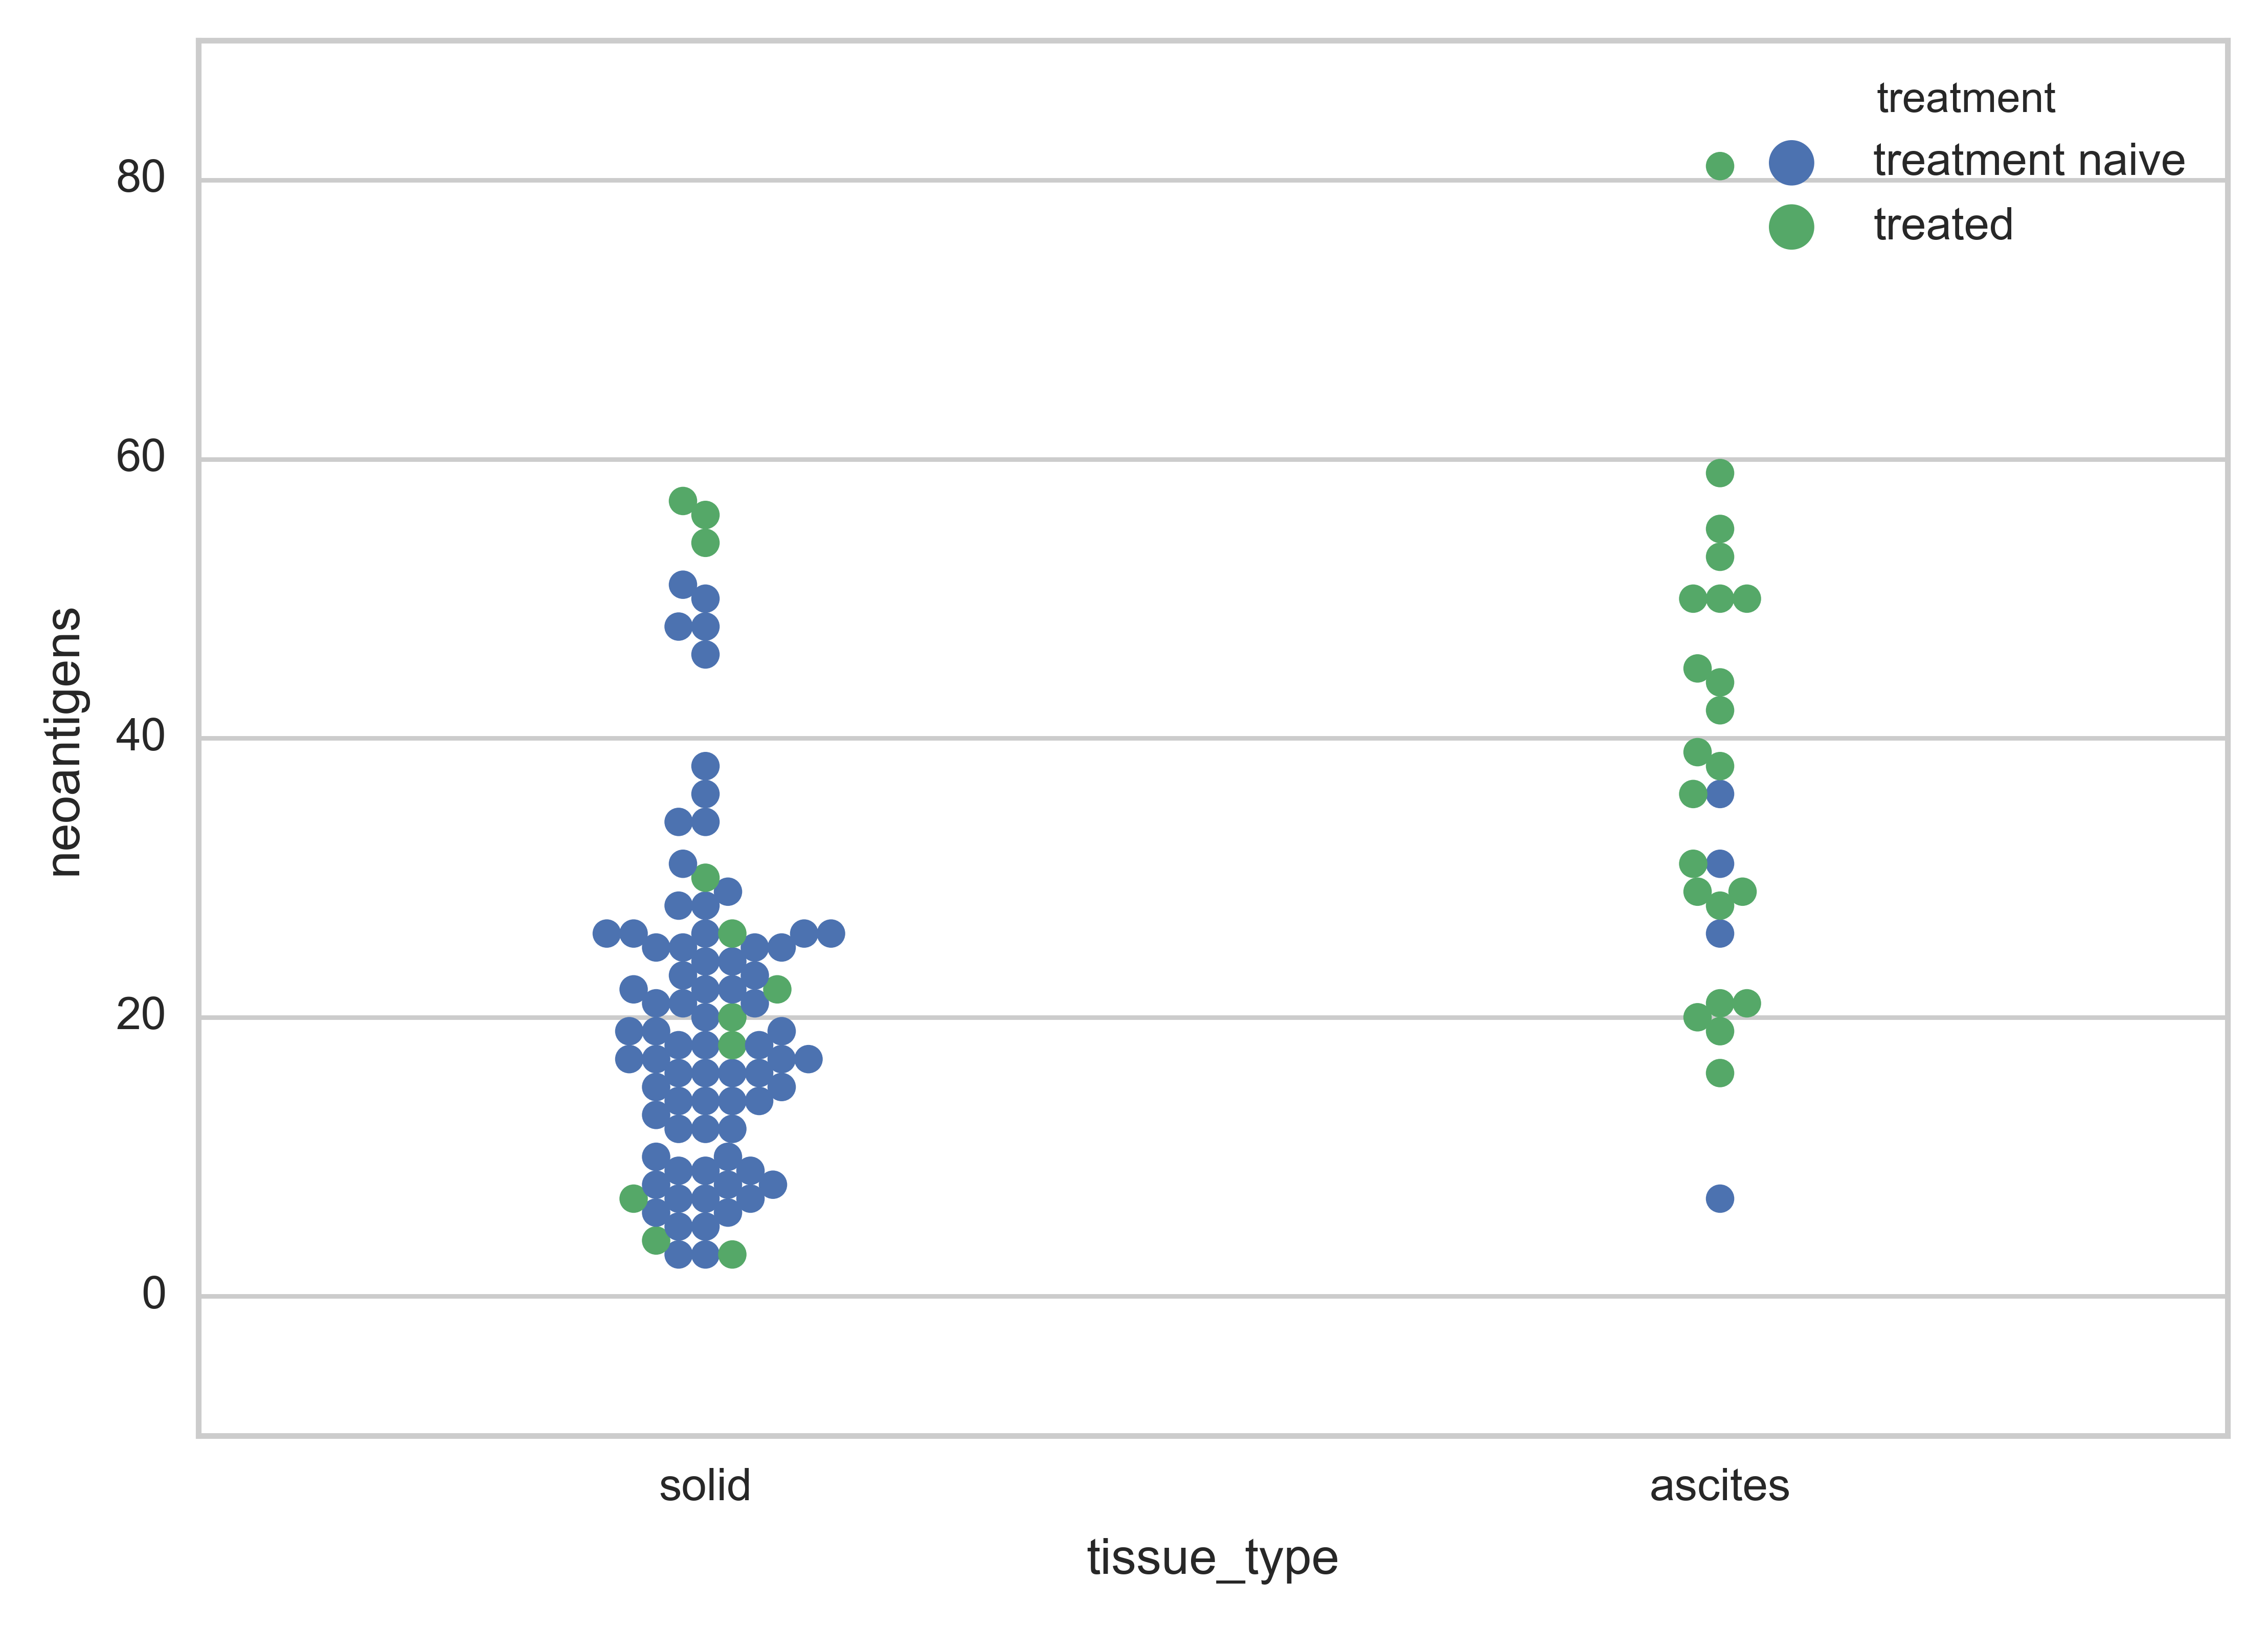

In [37]:
df = mutations.ix[~ mutations.rna_alt_reads.isnull()].ix[
    (
        (
            (mutations.confident)
        )
    )
    & (mutations.binding_affinity < 500)
    & (mutations.rna_alt_reads > 2)
].groupby("source_id").donor.count().to_frame().reset_index()
df.index = df.source_id
#del df["source_id"]
df.columns = ["source_id", "neoantigens"]
df["donor"] = sources.donor[df.index]
df["treated"] = sources.treated[df.index]
df["treatment"] = df.treated.map({True: "treated", False: "treatment naive"})
df["tissue_type"] = sources.tissue_type[df.index]

seaborn.set_context('paper')
#seaborn.boxplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")
seaborn.swarmplot(data=df, x="tissue_type", y="neoantigens", hue="treatment")


In [38]:
def source_display_name(name):
    return name

def abbreviated_source_display_name(name):
    return (name.split('/')[0]
            .replace("primary_", "")
            .replace("secondary_", "")
            .replace("left", "L")
            .replace("right", "R")
            .replace("pelvic_sidewalls", "sidewalls")
            .replace("end_of_care", "final"))
    
source_display_name = abbreviated_source_display_name

def series_signficance(series):    
    df = series.to_frame()
    (col,) = df.columns
    df["donor"] = sources.donor[df.index]
    df["treated"] = sources.treated[df.index]
    grouped = df.dropna().groupby(["donor", "treated"]).median().unstack().dropna()
    grouped["compare"] = (grouped[(col, False)] < grouped[(col, True)])
    
    counts = grouped["compare"].value_counts()
    print("Treated > untreated in %d of %d, p=%f. Mean change: %s absolute, percent: %s" % (
            counts.get(True, 0),
            counts.sum(),
            scipy.stats.binom_test([counts.get(True, 0), counts.get(False, 0)]),
            mean_with_errorbars(grouped[(col, True)] - grouped[(col, False)]),
            mean_with_errorbars(grouped[(col, True)] * 100.0 / grouped[(col, False)])
        ))
    counts
    
def plot_series(series, only_multiple=True, color_column='timepoint', use_hatch=False, figsize=(18,5), order='donor', legend_loc='upper right', legend=True, legend_bbox_to_anchor=None):
    if isinstance(series.tolist()[0], (list, numpy.ndarray)) and series.tolist()[0][0] in (True, False):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.mean(x) - numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
                ("high", [numpy.mean(x) + numpy.sqrt((numpy.mean(x) * (1 - numpy.mean(x)) / len(x))) for x in series]),
        ]), index=series.index)
        df = df * 100.0
    elif isinstance(series.tolist()[0], (list, numpy.ndarray)):
        df = pandas.DataFrame(collections.OrderedDict([
                ("value", [numpy.mean(x) for x in series]),
                ("low", [numpy.percentile(x, 5) for x in series]),
                ("high", [numpy.percentile(x, 95) for x in series]),
        ]), index=series.index)
    else:
        df = pandas.DataFrame({"value": series}, index=series.index)
    
    series_signficance(df.value)
    
    if order == 'donor':
        def sort_key(source):
            return (sources.ix[source].donor, sources.ix[source].interval_days, sources.ix[source].treated)
    elif order == 'num_sources':
         def sort_key(source):
            donor = sources.ix[source].donor
            num_treated = len([s for s in sources.index if sources.ix[s].donor == donor and sources.ix[s].treated])
            num_sources = len([s for s in sources.index if sources.ix[s].donor == donor])
            return (num_treated * -1, num_sources * -1, donor, sources.ix[source].interval_days, sources.ix[source].treated)
    else:
        raise ValueError("Unknown ordering %s" % order)
            
    sources_ordered = sorted(df.index.tolist(), key=sort_key)
    if only_multiple:
        sources_ordered = [
            s for s in sources_ordered if len(set(
                [sources.ix[other_source].treated for other_source in sources.ix[sources_ordered].ix[sources.donor == sources.ix[s].donor].index])) > 1
        ]
    
    df = df.ix[sources_ordered]

    adjacent_space = 0
    minor_space = 0
    major_space = 2
    bar_width = 2

    colors = []
    
    def color_and_hatch(info):
        color = None
        hatch = None
        primary_like = None
        if color_column == 'timepoint':
            primary_like = info['timepoint'] == "primary"    
        elif color_column == 'treated':
            primary_like = not info['treated']
        else:
            assert False
        
        if use_hatch:
            primary_color = seaborn.color_palette("deep")[0]
            recurrence_color = seaborn.color_palette("deep")[1]
            hatch = '/' if info['tissue_type'] == 'ascites' else None
            color = primary_color if primary_like else recurrence_color
        else:
            primary_colors = seaborn.color_palette("Blues")
            recurrence_colors = seaborn.color_palette("Greens")
            index = 3 if info['tissue_type'] == 'ascites' else -1
            color = (primary_colors if primary_like else recurrence_colors)[index]
        return (color, hatch)


    for source in sources_ordered:
        colors.append(color_and_hatch(sources.ix[source])[0])

    x_values = [bar_width]
    for (prev_source_i, source) in enumerate(sources_ordered[1:]):
        prev_source = sources_ordered[prev_source_i]
        x_increment = None
        if sources.ix[prev_source].donor != sources.ix[source].donor:
            x_increment = major_space
        elif sources.ix[prev_source].interval_days != sources.ix[source].interval_days:
            x_increment = minor_space
        else:
            x_increment = adjacent_space
        x_values.append(x_values[-1] + bar_width + x_increment)
    x_values = numpy.array(x_values)

    #seaborn.set_context("talk")
    #pyplot.figure(figsize=figsize)
    bars = pyplot.bar(
        x_values,
        df.value,
        bar_width,
        yerr=[df.value - df.low, df.high - df.value] if 'low' in df else None,
        error_kw={
            'ecolor': 'black',
            'capsize': 3,
            'elinewidth': 4
        },
        color = colors)
    for (bar, source) in zip(bars, sources_ordered):
        hatch = color_and_hatch(sources.ix[source])[1]
        if hatch is not None:
            bar.set_hatch(hatch)

    ax = pyplot.gca()
    pyplot.xticks(x_values + bar_width / 2, [source_display_name(s) for s in sources_ordered], rotation="vertical", fontsize=6)
    #pyplot.xticks(x_values + bar_width / 2, ["" for s in sources_ordered], rotation="vertical")
    pyplot.grid(False)
    ax.yaxis.grid(True, color='gray', linewidth=0.5)
    ax.patch.set_facecolor("None")
    pyplot.xlim(xmin=0, xmax=x_values.max() + bar_width + 5)

    #dummies = [ax.plot([], [], ls='-', c=c)[0] for c in color_map.values()]
    #ax.legend(dummies, [" ".join(tpl) for tpl in color_map], fontsize='xx-large', ncol=2)

    if legend:
        class CustomLegend(object):
            def __init__(self, color, hatch=None):
                self.color = color
                self.hatch = hatch

            def legend_artist(self, legend, orig_handle, fontsize, handlebox):
                x0, y0 = handlebox.xdescent, handlebox.ydescent
                width, height = handlebox.width, handlebox.height
                patch = matplotlib.patches.Rectangle([x0, y0], width, height, facecolor=self.color,
                                           edgecolor=None, hatch=self.hatch, lw=0,
                                           transform=handlebox.get_transform())
                handlebox.add_artist(patch)
                return patch

        class PrimarySolidLegend(object):
            label = "primary solid" if color_column == 'timepoint' else "untreated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'solid'}))

        class RecurrenceSolidLegend(object):
            label = "recurrence solid" if color_column == 'timepoint' else "treated solid"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'solid'}))

        class PrimaryAscitesLegend(object):
            label = "primary ascites" if color_column == 'timepoint' else "untreated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'primary', 'treated': False, 'tissue_type': 'ascites'}))

        class RecurrenceAscitesLegend(object):
            label = "recurrence ascites" if color_column == 'timepoint' else "treated ascites"
            handler = CustomLegend(*color_and_hatch({'timepoint': 'recurrence', 'treated': True, 'tissue_type': 'ascites'}))

        legend_classes = [PrimarySolidLegend(), PrimaryAscitesLegend(), RecurrenceSolidLegend(), RecurrenceAscitesLegend()]


        leg = pyplot.legend(legend_classes, [x.label for x in legend_classes],
                      handler_map = dict((c, c.handler) for c in legend_classes),
                      bbox_to_anchor=legend_bbox_to_anchor,
                      fontsize=6,
                      loc=legend_loc, ncol=4)
        leg.set_frame_on(True)

#series = mutations_any_alt_reads.groupby("source_id")["donor"].count()
#plot_series(series, use_hatch=False)


Treated > untreated in 11 of 12, p=0.006348. Mean change: 1 (1-2) absolute, percent: 157 (130-180)
Treated > untreated in 10 of 12, p=0.038574. Mean change: 67 (15-120) absolute, percent: 137 (120-160)
Treated > untreated in 9 of 12, p=0.145996. Mean change: 43 (13-74) absolute, percent: 197 (130-270)


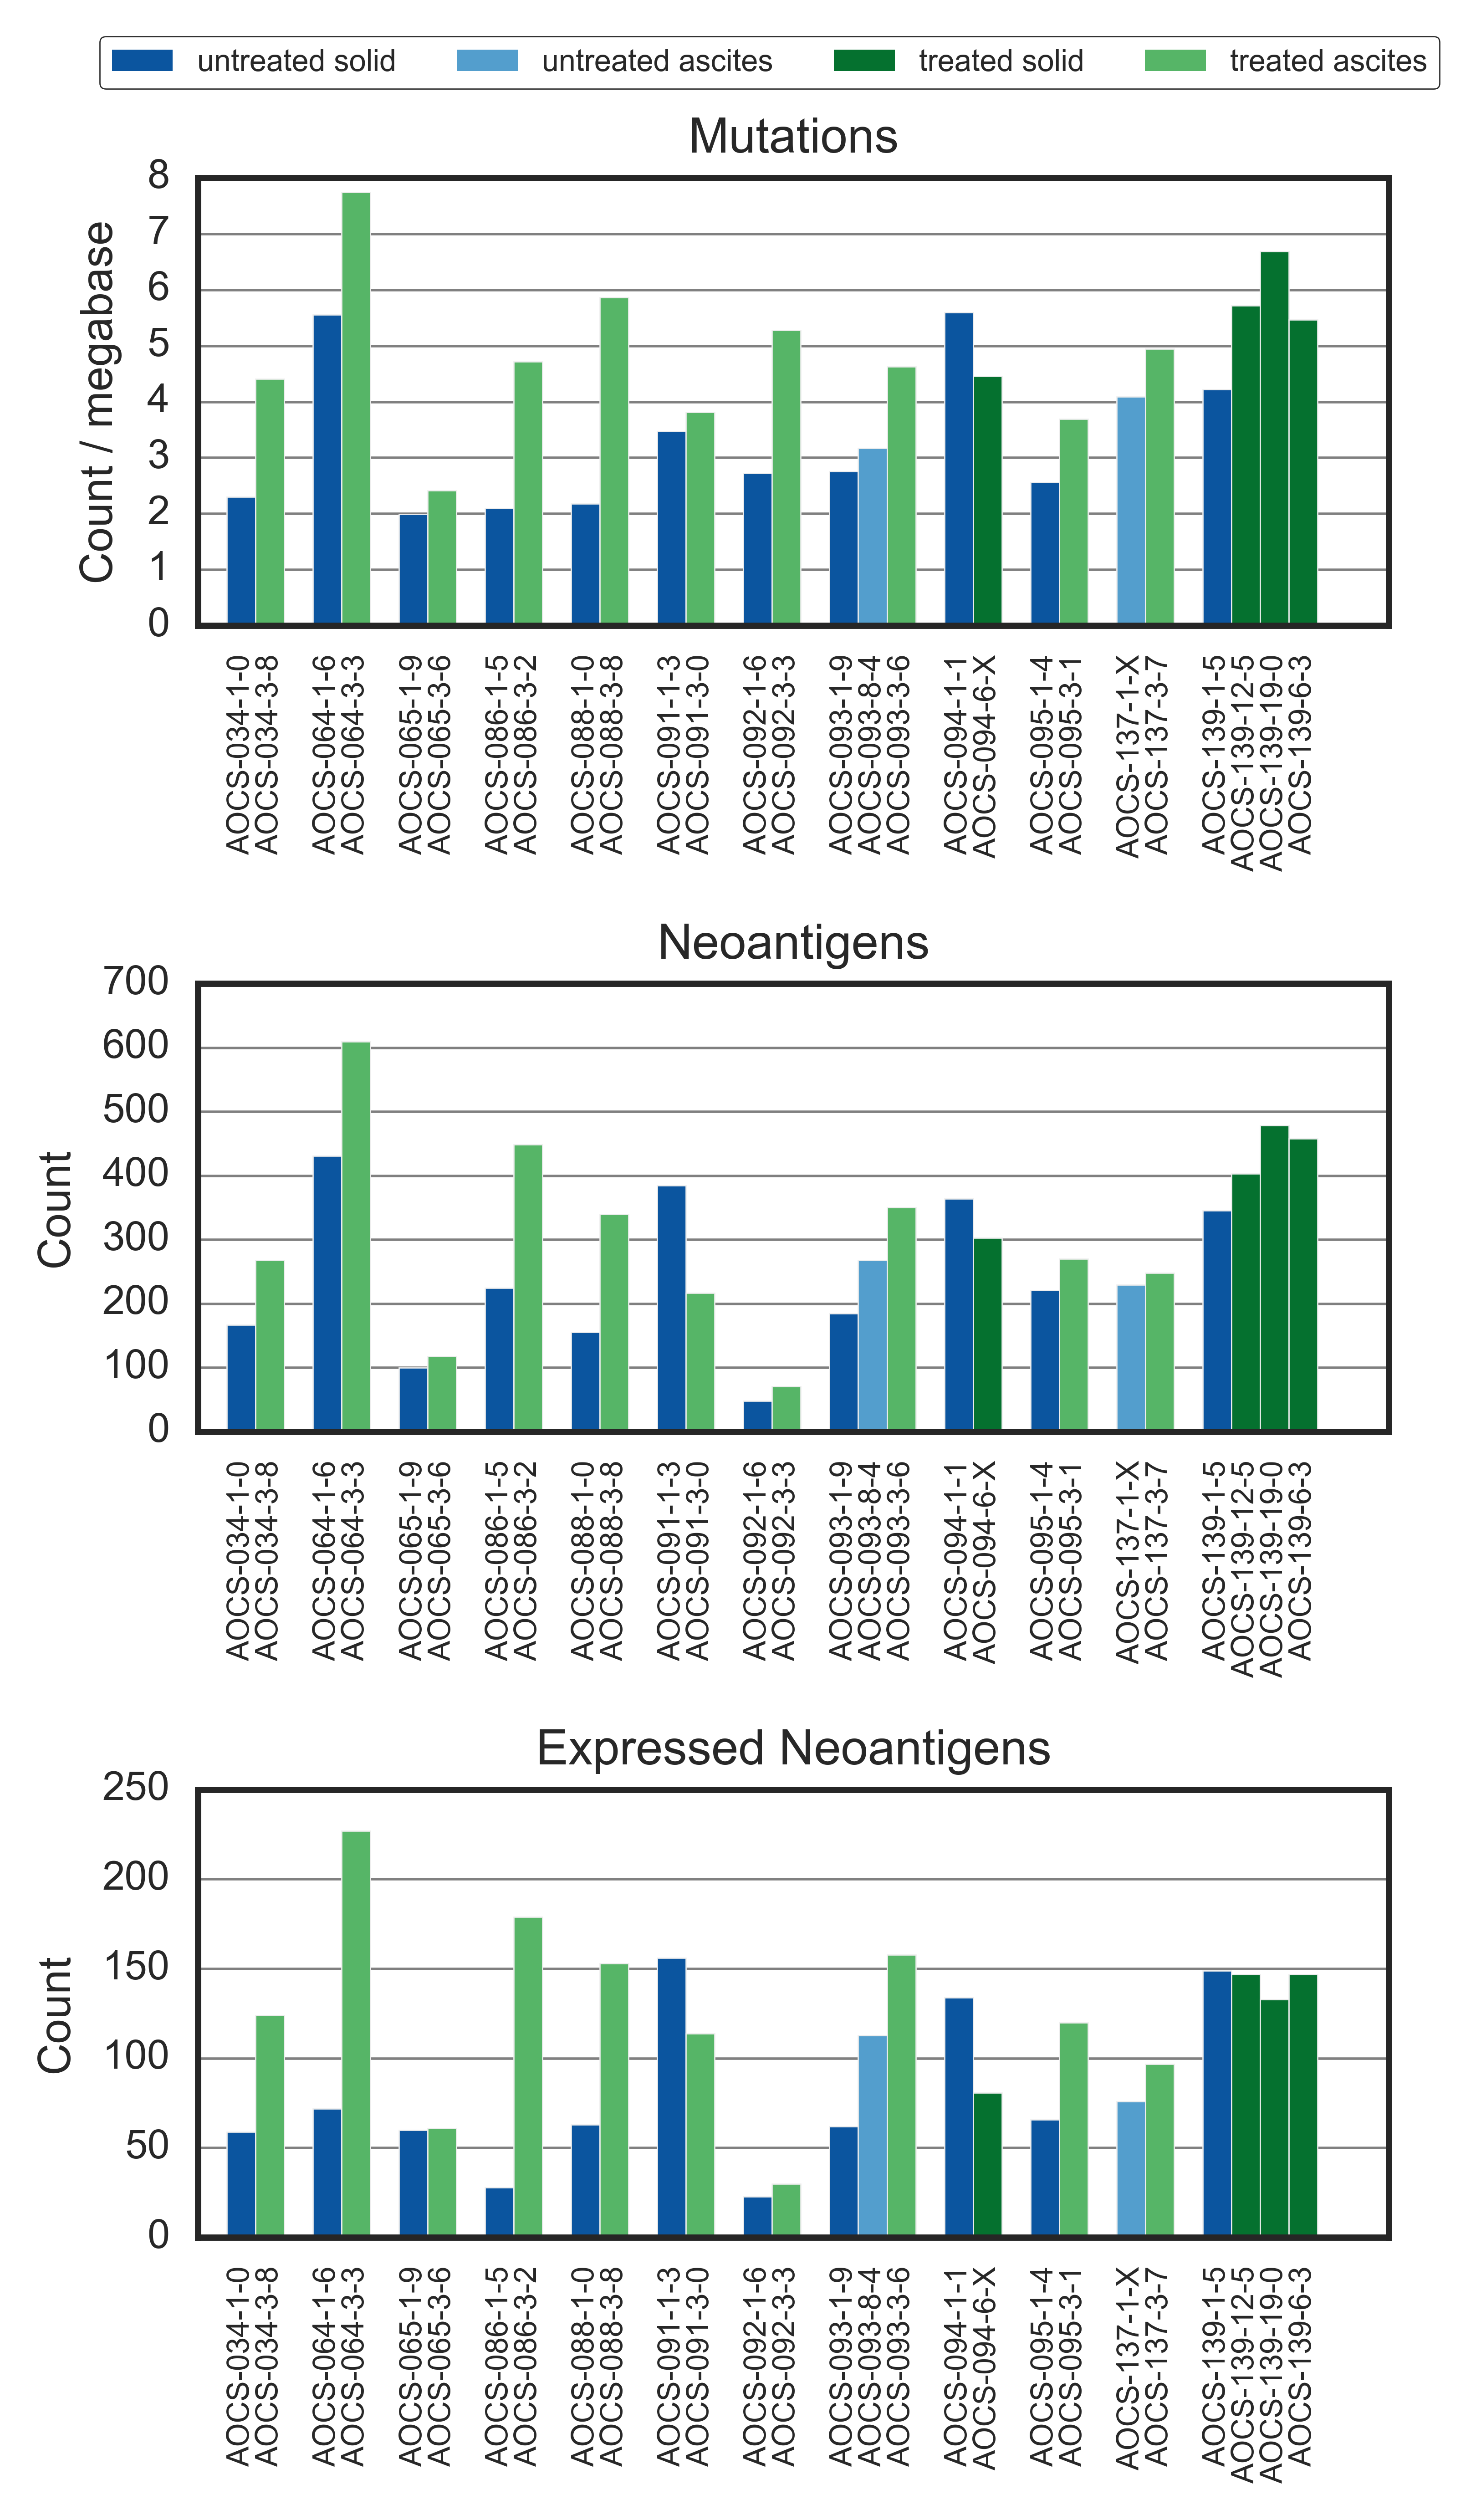

In [39]:
seaborn.set_context('paper')
seaborn.set_style('white')

## Paired analyses
#sub_sources = sources.ix[sources.timepoint_paired]
sub_sources = sources.copy()

fig = pyplot.figure(figsize=(4,7))
seaborn.set_context('paper')

grid=(3,1)

ax = pyplot.subplot2grid(grid,(0, 0))
plot_series(
    sub_sources.mutations_per_mb.dropna(),
    color_column='treated',
    legend_loc="upper center",
    legend_bbox_to_anchor=(0.48,1.35),
)
pyplot.title("Mutations")
pyplot.ylabel("Count / megabase")
#pyplot.setp( ax.get_xticklabels(), visible=False)
pyplot.subplots_adjust(top=0.25)

ax = pyplot.subplot2grid(grid,(1, 0))
plot_series(sub_sources.peptides.dropna(), color_column='treated', legend=False)
pyplot.title("Neoantigens")
pyplot.ylabel("Count")


ax = pyplot.subplot2grid(grid,(2, 0), sharey=None)
plot_series(sub_sources["expressed peptides"].dropna(),
            color_column='treated',
            legend=False,
)
pyplot.title("Expressed Neoantigens")
pyplot.ylabel("Count")

pyplot.tight_layout()

pyplot.savefig("../figures/paired_counts.pdf", rect=(0, 0, 1, 1.5))


In [40]:
df.groupby(["tissue_type", "treatment"])["neoantigens"].mean()
df.groupby(["tissue_type", "treatment"])["source_id"].unique()

tissue_type  treatment      
ascites      treated            [AOCS-034-3-8, AOCS-064-3-3, AOCS-065-3-6, AOC...
             treatment naive    [AOCS-093-8-4, AOCS-137-1-X, AOCS-170-3-5, AOC...
solid        treated            [AOCS-077-1-6, AOCS-094-6-X, AOCS-106-1-1, AOC...
             treatment naive    [AOCS-001-1-7, AOCS-004-1-5, AOCS-005-1-8, AOC...
Name: source_id, dtype: object

In [41]:
# Shared peptides
expressed_peptide_to_donor_to_index = collections.defaultdict(dict)
for (i, row) in muts_confident[muts_confident.rna_alt_reads > 2].iterrows():
    for (peptide, value) in row.binding_peptides.items():
        if value <= 500:
            expressed_peptide_to_donor_to_index[peptide][row.donor] = i
    
len(expressed_peptide_to_donor_to_index)

7079

In [42]:
26 * 100. / 18336

0.1417975567190227

In [43]:
# STATEMENT_NEOANTIGENS1
# Shared peptides
peptide_to_donor_to_index = collections.defaultdict(dict)
for (i, row) in muts_confident.iterrows():
    for (peptide, value) in row.binding_peptides.items():
        if value <= 500:
            peptide_to_donor_to_index[peptide][row.donor] = i
    
len(peptide_to_donor_to_index)

17689

In [44]:
set(len(x) for x in peptide_to_donor_to_index)

{8, 9, 10, 11}

In [45]:
repeat_peptides = sorted(set(x for (x, donors) in peptide_to_donor_to_index.items() if len(donors) > 1))
len(repeat_peptides)

21

In [46]:
len(repeat_peptides) * 100.0 / len(peptide_to_donor_to_index)

0.1187178472497032

In [47]:
df = pandas.DataFrame({
        'peptide': repeat_peptides,
        'donors': [" ".join(peptide_to_donor_to_index[peptide]) for peptide in repeat_peptides],
        'indices': [
            list(itertools.chain(peptide_to_donor_to_index[peptide].values()))
            for peptide in repeat_peptides
        ]})
df["effects"] = [
    [muts_confident.ix[index].effect for index in row.indices]
    for (i, row) in df.iterrows()
]
df["genes"] = [
    [muts_confident.ix[index].gene for index in row.indices]
    for (i, row) in df.iterrows()
]
pandas.set_option('display.width', 1000)

print_full(df[["peptide", "genes", "effects"]])
df[["peptide", "donors", "genes", "effects"]]

        peptide                       genes               effects
0     ALFVTWSTM            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
1      CPTTPAPL                [TP53, TP53]  [p.R249fs, p.T304fs]
2      CVFSLLAI  [DNMT1 S1PR2, DNMT1 S1PR2]    [p.S119C, p.S119C]
3     FVTWSTMEF            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
4     HWMENISPF                [TP53, TP53]  [p.R249fs, p.T304fs]
5    ITLSACVFSL  [DNMT1 S1PR2, DNMT1 S1PR2]    [p.S119C, p.S119C]
6    LFVTWSTMEF            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
7   LLGRNSFEVHV                [TP53, TP53]    [p.R273H, p.R273H]
8    LPSQRRNHWM                [TP53, TP53]  [p.R249fs, p.T304fs]
9     MAYDHYVAI              [OR1N1, OR4S1]    [p.R120H, p.R120H]
10    RSVGVSASR                [TP53, TP53]  [p.R249fs, p.T304fs]
11    STMEFSLWY            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
12   STMEFSLWYM            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
13     SVGVSASR                [TP53, TP53]  [p.R249fs, p.T304fs]
14    TLSA

peptide             donors                       genes               effects
0     ALFVTWSTM  AOCS-168 AOCS-115            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
1      CPTTPAPL  AOCS-157 AOCS-064                [TP53, TP53]  [p.R249fs, p.T304fs]
2      CVFSLLAI  AOCS-135 AOCS-166  [DNMT1 S1PR2, DNMT1 S1PR2]    [p.S119C, p.S119C]
3     FVTWSTMEF  AOCS-168 AOCS-115            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
4     HWMENISPF  AOCS-157 AOCS-064                [TP53, TP53]  [p.R249fs, p.T304fs]
5    ITLSACVFSL  AOCS-135 AOCS-166  [DNMT1 S1PR2, DNMT1 S1PR2]    [p.S119C, p.S119C]
6    LFVTWSTMEF  AOCS-168 AOCS-115            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
7   LLGRNSFEVHV  AOCS-131 AOCS-106                [TP53, TP53]    [p.R273H, p.R273H]
8    LPSQRRNHWM  AOCS-157 AOCS-064                [TP53, TP53]  [p.R249fs, p.T304fs]
9     MAYDHYVAI  AOCS-155 AOCS-113              [OR1N1, OR4S1]    [p.R120H, p.R120H]
10    RSVGVSASR  AOCS-157 AOCS-064                [TP53, TP53]  [p.R249fs, p.T304fs]
11    STMEFSLWY  AOCS-168 AOCS-115            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
12   STMEFSLWYM  AOCS-168 AOCS-115            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
13     SVGVSASR  AOCS-157 AOCS-064                [TP53, TP53]  [p.R249fs, p.T304fs]
14    TLSACVFSL  AOCS-135 AOCS-166  [DNMT1 S1PR2, DNMT1 S1PR2]    [p.S119C, p.S119C]
15     TRAATVSV  AOCS-162 AOCS-112                [TP53, TP53]    [p.P85fs, p.S96fs]
16     VTIGGTSF  AOCS-057 AOCS-143              [OR5A1, OR5A1]    [p.V209I, p.V209I]
17    VTIGGTSFL  AOCS-057 AOCS-143              [OR5A1, OR5A1]    [p.V209I, p.V209I]
18  VTIGGTSFLQL  AOCS-057 AOCS-143              [OR5A1, OR5A1]    [p.V209I, p.V209I]
19     VTWSTMEF  AOCS-168 AOCS-115            [MT-ND5, MT-ND5]    [p.I100T, p.I100T]
20   VVVPCEPPEV  AOCS-158 AOCS-057                [TP53, TP53]    [p.Y220C, p.Y220C]

In [48]:
sum(['TP53' in x.genes and 'fs' in "".join(x.effects) for (_, x) in df.iterrows() ])

6

In [49]:
def mean_with_std(grouped_column, decimals=0):
    pattern = "%%0.%df" % decimals
    return [
        (pattern + " +/ " + pattern) % (m, s) if not pandas.isnull(s) else pattern % m
        for (m, s) in zip(grouped_column.mean(), grouped_column.std())
    ]

def means_with_errorbars(grouped_column, decimals=0, plusminus=False):
    index = []
    values = []
    for (i, grouped) in grouped_column:
        index.append(i)
        values.append(mean_with_errorbars(grouped, decimals=decimals, plusminus=plusminus))
    return pandas.Series(values, index=index)
    
samples_with_rna = mutations.source_id.ix[mutations.rna_total_reads > 0].unique()

grouping_columns = ["cohort", "tissue_type", "treated"]
grouped = sources.groupby(grouping_columns)

df = grouped.donor.nunique().to_frame() #.reset_index()
df["samples"] = grouped.donor.count().to_frame()["donor"]
df["samples with RNA"] = sources.ix[sources.index.isin(samples_with_rna)].groupby(grouping_columns).donor.count().to_frame()["donor"]
df["Mutations"] = means_with_errorbars(grouped.mutations, plusminus=True)
#df["C(C>A)C percent"] = means_with_errorbars(grouped["interesting mutations"], decimals=2)
#df["Protein changing"] = means_with_errorbars(grouped["protein changing"])
df["Neoantigens"] = means_with_errorbars(grouped.peptides, plusminus=True)
df["Expressed"] = means_with_errorbars(grouped["expressed peptides"], plusminus=True)


df = df.reset_index()
df["treated"] = df.treated.map({False: "untreated", True: "post-treatment"})
df["samples"] = ["%d (%d)" % (row.samples, row["samples with RNA"]) for (i, row) in df.iterrows()]
del df["samples with RNA"]
df = df.rename(columns={
        "donor": "donors",
        "treated": "treatment",
        "samples": "samples (RNA)",
        "tissue_type": "tissue type",
    })

#df.to_csv("../data/cohort.csv")
del df["cohort"]
#del df["library"]
df.index = ["%s %s" % (row["tissue type"], row["treatment"]) for (i, row) in df.iterrows()]
del df["tissue type"]
del df["treatment"]
del df["donors"]
df = df.applymap(str)
df
print(df.to_latex(index=True, index_names=False, escape=False))
df

\begin{tabular}{lllll}
\toprule
{} & samples (RNA) &         Mutations &   Neoantigens &     Expressed \\
\midrule
ascites untreated      &         4 (4) &  10260 $\pm$ 1000 &  191 $\pm$ 60 &   72 $\pm$ 20 \\
ascites post-treatment &       24 (24) &  13422 $\pm$ 1000 &  292 $\pm$ 50 &  128 $\pm$ 20 \\
solid untreated        &       75 (75) &    7862 $\pm$ 900 &  148 $\pm$ 20 &    56 $\pm$ 7 \\
solid post-treatment   &       11 (11) &  10690 $\pm$ 3000 &  246 $\pm$ 70 &   73 $\pm$ 20 \\
\bottomrule
\end{tabular}



samples (RNA)         Mutations   Neoantigens     Expressed
ascites untreated              4 (4)  10260 $\pm$ 1000  191 $\pm$ 60   72 $\pm$ 20
ascites post-treatment       24 (24)  13422 $\pm$ 1000  292 $\pm$ 50  128 $\pm$ 20
solid untreated              75 (75)    7862 $\pm$ 900  148 $\pm$ 20    56 $\pm$ 7
solid post-treatment         11 (11)  10690 $\pm$ 3000  246 $\pm$ 70   73 $\pm$ 20

In [50]:
'''
def calculate(sub_df):
    return pandas.DataFrame({
        "mutations change":
            [sub_df.ix[sub_df.treated].mutations.mean() / sub_df.ix[~ sub_df.treated].mutations.mean()],
        "neoantigens change":
            [sub_df.ix[sub_df.treated].peptides.mean() / sub_df.ix[~ sub_df.treated].peptides.mean()],
        "expressed neoantigens change":
            [sub_df.ix[sub_df.treated]["expressed peptides"].mean() / sub_df.ix[~ sub_df.treated]["expressed peptides"].mean()],
    })

ascites_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "ascites"], calculate, "source_id")
print_full(ascites_change[0])

solid_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "solid"], calculate, "source_id")
print_full(solid_change[0])
'''

'\ndef calculate(sub_df):\n    return pandas.DataFrame({\n        "mutations change":\n            [sub_df.ix[sub_df.treated].mutations.mean() / sub_df.ix[~ sub_df.treated].mutations.mean()],\n        "neoantigens change":\n            [sub_df.ix[sub_df.treated].peptides.mean() / sub_df.ix[~ sub_df.treated].peptides.mean()],\n        "expressed neoantigens change":\n            [sub_df.ix[sub_df.treated]["expressed peptides"].mean() / sub_df.ix[~ sub_df.treated]["expressed peptides"].mean()],\n    })\n\nascites_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "ascites"], calculate, "source_id")\nprint_full(ascites_change[0])\n\nsolid_change = bootstrap_mean_df(sources.ix[sources.tissue_type == "solid"], calculate, "source_id")\nprint_full(solid_change[0])\n'

In [51]:
sources

RNA_ID   RNA biospecimen                           DNA_id DNA_biospecimen                specimen_type_description CollectionPoint SpecimenType                                      RNA data file    DNA_sample_string icgc_sample_id project_code_x submitted_sample_id icgc_specimen_id submitted_specimen_id_x icgc_donor_id_x submitted_donor_id_x  analyzed_sample_interval  percentage_cellularity_x level_of_cellularity_x  study project_code_y study_specimen_involved_in submitted_specimen_id_y icgc_donor_id_y submitted_donor_id_y                                      specimen_type        specimen_type_other  specimen_interval specimen_donor_treatment_type specimen_donor_treatment_type_other specimen_processing  specimen_processing_other     specimen_storage  specimen_storage_other tumour_confirmed  specimen_biobank  specimen_biobank_id  specimen_available tumour_histological_type tumour_grading_system  tumour_grade  tumour_grade_supplemental tumour_stage_system  \
source_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
AOCS-001-1-7     ICGCDBDE20130916001      AOCS-001-2-0  AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7                           primary tumour         Primary       Tumour  130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...  ICGCDBPC20130205002       SA505244          OV-AU        AOCS-001-1-7         SP101515              AOCS-001-1         DO46325             AOCS-001                    1895.0                      73.0                 61-80%  PCAWG          OV-AU                      PCAWG              AOCS-001-1         DO46325             AOCS-001                      Primary tumour - solid tissue                        NaN                  0                  no treatment                                 NaN               fresh                        NaN  frozen, vapor phase                     NaN               no               NaN                  NaN                 NaN                   8441/3            Silverberg           3.0                        NaN                FIGO   
AOCS-004-1-5     ICGCDBDE20130916003      AOCS-004-2-9  AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5                           primary tumour         Primary       Tumour  130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...  ICGCDBPC20130205004       SA505270          OV-AU        AOCS-004-1-5         SP101519              AOCS-004-1         DO46327             AOCS-004                    1350.0                      77.0                 61-80%  PCAWG          OV-AU                      PCAWG              AOCS-004-1         DO46327             AOCS-004                      Primary tumour - solid tissue                        NaN                  0                  no treatment                                 NaN               fresh                        NaN  frozen, vapor phase                     NaN               no               NaN                  NaN                 NaN                   8441/3            Silverberg           3.0                        NaN                FIGO   
AOCS-005-1-8     ICGCDBDE2

In [52]:
# Write out extended sources
#icgc_specimens = pandas.read_table("../data/specimen.tsv", index_col="icgc_specimen_id")

sources_extended = sources.copy()
#sources_extended.index = [s.split("/")[1] for s in sources_extended.index]
#sources_extended = sources_extended.merge(icgc_specimens, left_index=True, right_index=True)
sources_extended = sources_extended.dropna('columns', how='all').reset_index("source_id", drop=True)
#sources_extended.to_csv("../data/sources.extended.csv")
sources_extended.index = sources_extended.source_id
#del sources_extended["source_id"]
sources_extended

RNA_ID   RNA biospecimen                           DNA_id DNA_biospecimen                specimen_type_description CollectionPoint SpecimenType                                      RNA data file    DNA_sample_string icgc_sample_id project_code_x submitted_sample_id icgc_specimen_id submitted_specimen_id_x icgc_donor_id_x submitted_donor_id_x  analyzed_sample_interval  percentage_cellularity_x level_of_cellularity_x  study project_code_y study_specimen_involved_in submitted_specimen_id_y icgc_donor_id_y submitted_donor_id_y                                      specimen_type        specimen_type_other  specimen_interval specimen_donor_treatment_type specimen_donor_treatment_type_other specimen_processing     specimen_storage tumour_confirmed tumour_histological_type tumour_grading_system  tumour_grade tumour_stage_system tumour_stage  percentage_cellularity_y level_of_cellularity_y cohort     donor tissue_type   timepoint treated metastasis  interval_days  \
source_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
AOCS-001-1-7     ICGCDBDE20130916001      AOCS-001-2-0  AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7                           primary tumour         Primary       Tumour  130906_D81P8DQ1_0153_C2704ACXX.nopd.AOCS_001_I...  ICGCDBPC20130205002       SA505244          OV-AU        AOCS-001-1-7         SP101515              AOCS-001-1         DO46325             AOCS-001                    1895.0                      73.0                 61-80%  PCAWG          OV-AU                      PCAWG              AOCS-001-1         DO46325             AOCS-001                      Primary tumour - solid tissue                        NaN                  0                  no treatment                                 NaN               fresh  frozen, vapor phase               no                   8441/3            Silverberg           3.0                FIGO          III                      73.0                 61-80%   AOCS  AOCS-001       solid     primary   False      False              0   
AOCS-004-1-5     ICGCDBDE20130916003      AOCS-004-2-9  AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5                           primary tumour         Primary       Tumour  130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_004_I...  ICGCDBPC20130205004       SA505270          OV-AU        AOCS-004-1-5         SP101519              AOCS-004-1         DO46327             AOCS-004                    1350.0                      77.0                 61-80%  PCAWG          OV-AU                      PCAWG              AOCS-004-1         DO46327             AOCS-004                      Primary tumour - solid tissue                        NaN                  0                  no treatment                                 NaN               fresh  frozen, vapor phase               no                   8441/3            Silverberg           3.0                FIGO          III                      77.0                 61-80%   AOCS  AOCS-004       solid     primary   False      False              0   
AOCS-005-1-8     ICGCDBDE2

In [53]:
# STATEMENT_MEDIAN_NEOANTIGENS
print(sources_extended["expressed peptides"].median())
bootstrap(sources_extended["expressed peptides"], numpy.median)


61.0


(54.5, 69.0)